In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Reading Current_application data
df_ca=pd.read_csv("application_data.csv")
df_ca.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
## Dropping the columns where more than 50% column value is Blank.
df_ca2=df_ca[df_ca.columns[(df_ca.isnull().sum())< (df_ca.shape[0]//2)]]
df_ca2.shape

(307511, 81)

## Identify and Impute Missing values

In [4]:
def getMissingValues(df):
    missing_values=df.count()/len(df)

    missing_values=(1-missing_values)*100
    missing_values.sort_values(ascending=False,inplace=True)
    return missing_values

missing_values=getMissingValues(df_ca2)
missing_values[missing_values>0].head(30)
print(len(missing_values))

81


In [5]:
numericalMissing=list(df_ca2[df_ca2.columns[df_ca2.isnull().sum()>0]].describe().columns)
print(len(numericalMissing))
numericalMissing

23


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [6]:
for col in numericalMissing:
    print(df_ca2[col].value_counts(normalize=True))

9000.0     0.020764
13500.0    0.017932
6750.0     0.007411
10125.0    0.006618
37800.0    0.005210
             ...   
15210.0    0.000003
50265.0    0.000003
73012.5    0.000003
40558.5    0.000003
4437.0     0.000003
Name: AMT_ANNUITY, Length: 13672, dtype: float64
450000.0    0.084698
225000.0    0.082289
675000.0    0.081248
900000.0    0.050177
270000.0    0.037197
              ...   
705892.5    0.000003
442062.0    0.000003
353641.5    0.000003
353749.5    0.000003
738945.0    0.000003
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64
2.0     0.514967
1.0     0.220634
3.0     0.171055
4.0     0.080313
5.0     0.011310
6.0     0.001327
7.0     0.000263
8.0     0.000065
9.0     0.000020
10.0    0.000010
14.0    0.000007
16.0    0.000007
12.0    0.000007
20.0    0.000007
11.0    0.000003
13.0    0.000003
15.0    0.000003
Name: CNT_FAM_MEMBERS, dtype: float64
0.285898    0.002350
0.262258    0.001359
0.265256    0.001118
0.159679    0.001049
0.265312    0.000997
              ..

In [7]:
def distPlot(col,df):
    sns.distplot(df[col])
    plt.axvline(df[col].mean(), color='Green', label="mean")
    plt.axvline(df[col].median(), color='Red', label="median")
    plt.legend()
    plt.show()         

Distribution plot for  AMT_ANNUITY


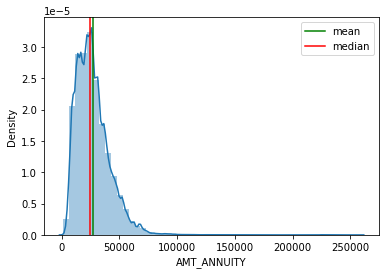

Distribution plot for  AMT_GOODS_PRICE


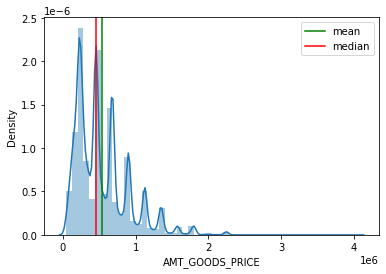

Distribution plot for  CNT_FAM_MEMBERS


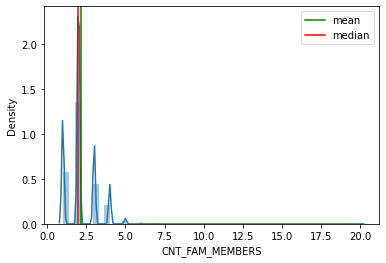

Distribution plot for  EXT_SOURCE_2


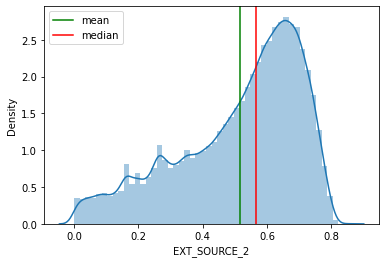

Distribution plot for  EXT_SOURCE_3


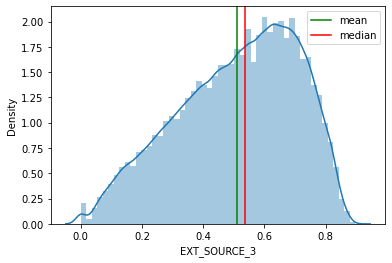

Distribution plot for  YEARS_BEGINEXPLUATATION_AVG


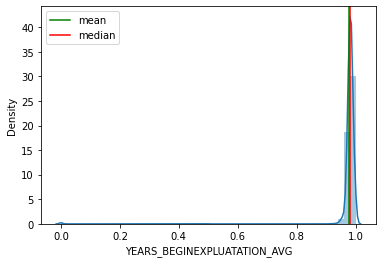

Distribution plot for  FLOORSMAX_AVG


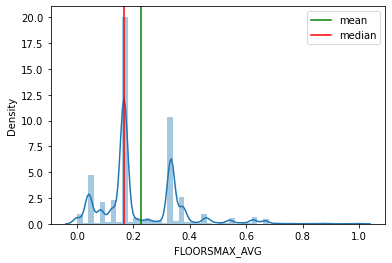

Distribution plot for  YEARS_BEGINEXPLUATATION_MODE


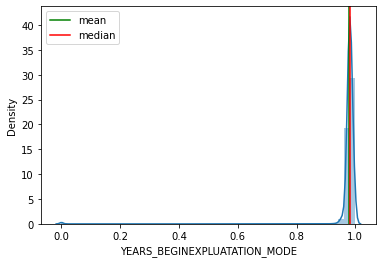

Distribution plot for  FLOORSMAX_MODE


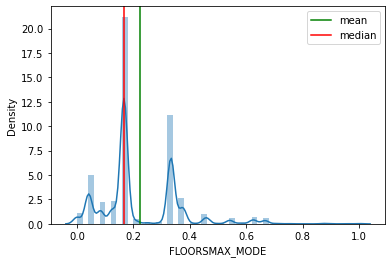

Distribution plot for  YEARS_BEGINEXPLUATATION_MEDI


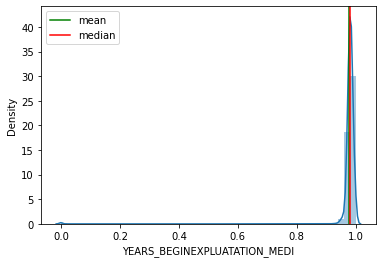

Distribution plot for  FLOORSMAX_MEDI


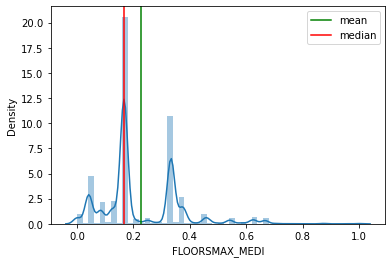

Distribution plot for  TOTALAREA_MODE


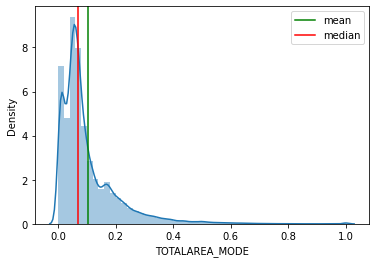

Distribution plot for  OBS_30_CNT_SOCIAL_CIRCLE


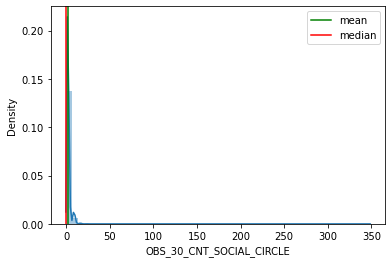

Distribution plot for  DEF_30_CNT_SOCIAL_CIRCLE


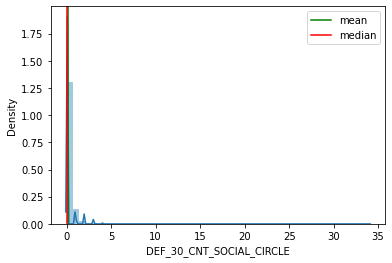

Distribution plot for  OBS_60_CNT_SOCIAL_CIRCLE


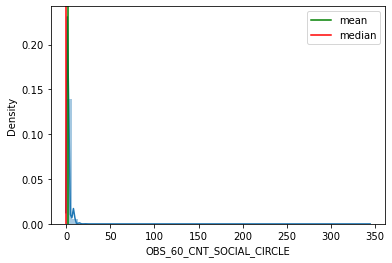

Distribution plot for  DEF_60_CNT_SOCIAL_CIRCLE


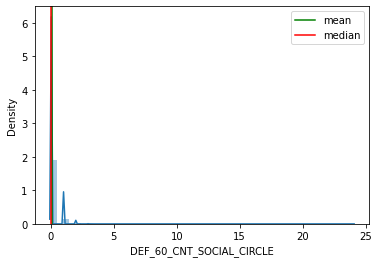

Distribution plot for  DAYS_LAST_PHONE_CHANGE


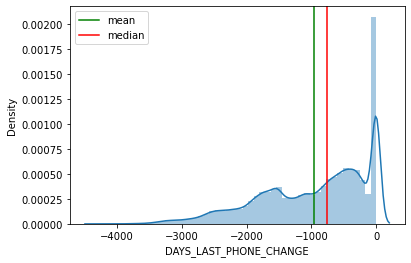

Distribution plot for  AMT_REQ_CREDIT_BUREAU_HOUR


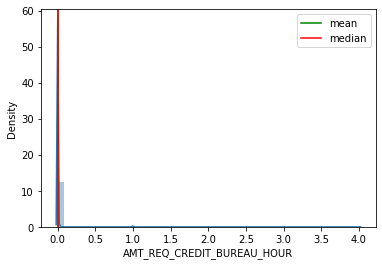

Distribution plot for  AMT_REQ_CREDIT_BUREAU_DAY


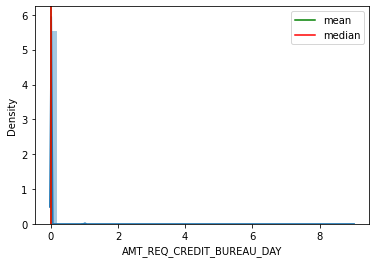

Distribution plot for  AMT_REQ_CREDIT_BUREAU_WEEK


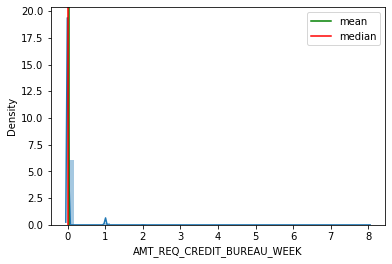

Distribution plot for  AMT_REQ_CREDIT_BUREAU_MON


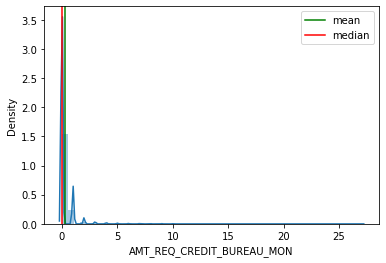

Distribution plot for  AMT_REQ_CREDIT_BUREAU_QRT


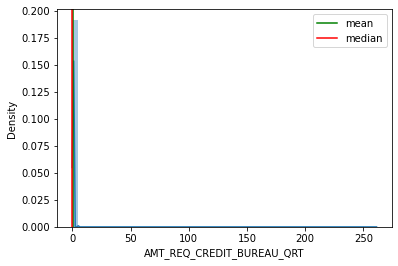

Distribution plot for  AMT_REQ_CREDIT_BUREAU_YEAR


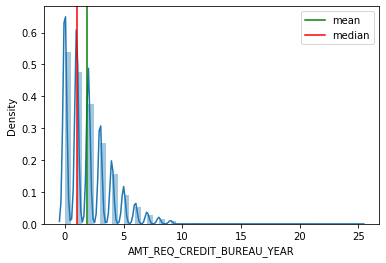

In [8]:
for col in numericalMissing:
    print("Distribution plot for ",col)
    distPlot(col,df_ca2)


In [9]:
###Data Mean & Median values are very close to eachother. Hence updating the values with Mean
df_ca2["AMT_ANNUITY"].fillna(df_ca2["AMT_ANNUITY"].mean(), inplace=True)
df_ca2["AMT_GOODS_PRICE"].fillna(df_ca2["AMT_GOODS_PRICE"].mean(), inplace=True)
df_ca2["YEARS_BEGINEXPLUATATION_MEDI"].fillna(df_ca2["YEARS_BEGINEXPLUATATION_MEDI"].mean(), inplace=True)
df_ca2["YEARS_BEGINEXPLUATATION_MODE"].fillna(df_ca2["YEARS_BEGINEXPLUATATION_MODE"].mean(), inplace=True)
df_ca2["YEARS_BEGINEXPLUATATION_AVG"].fillna(df_ca2["YEARS_BEGINEXPLUATATION_AVG"].mean(), inplace=True)

##if family members nu missing means mostly client doesn't have any members. Hence updating that with 0
df_ca2["CNT_FAM_MEMBERS"].fillna(0, inplace=True)



In [10]:
##Data is in float but its present the no.of days so if value is missing means it should represent 0 days 
##And that is the mode value as well. Hence updating the missing value with Mode
df_ca2["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(df_ca2["OBS_60_CNT_SOCIAL_CIRCLE"].mode()[0], inplace=True)
df_ca2["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(df_ca2["OBS_30_CNT_SOCIAL_CIRCLE"].mode()[0], inplace=True)
df_ca2["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(df_ca2["DEF_30_CNT_SOCIAL_CIRCLE"].mode()[0], inplace=True)
df_ca2["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(df_ca2["DEF_60_CNT_SOCIAL_CIRCLE"].mode()[0], inplace=True)
df_ca2["DAYS_LAST_PHONE_CHANGE"].fillna(df_ca2["DAYS_LAST_PHONE_CHANGE"].mode()[0], inplace=True)
df_ca2["AMT_REQ_CREDIT_BUREAU_MON"].fillna(df_ca2["AMT_REQ_CREDIT_BUREAU_MON"].mode()[0], inplace=True)
df_ca2["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(df_ca2["AMT_REQ_CREDIT_BUREAU_WEEK"].mode()[0], inplace=True)
df_ca2["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(df_ca2["AMT_REQ_CREDIT_BUREAU_DAY"].mode()[0], inplace=True)
df_ca2["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(df_ca2["AMT_REQ_CREDIT_BUREAU_HOUR"].mode()[0], inplace=True)
df_ca2["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(df_ca2["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0], inplace=True)
df_ca2["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(df_ca2["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0], inplace=True)

###Data Is Not Normally Distributed for these columns, Hence updating with Median value
df_ca2["FLOORSMAX_MODE"].fillna(df_ca2["FLOORSMAX_MODE"].median(), inplace=True)
df_ca2["FLOORSMAX_AVG"].fillna(df_ca2["FLOORSMAX_AVG"].median(), inplace=True)
df_ca2["FLOORSMAX_MEDI"].fillna(df_ca2["FLOORSMAX_MEDI"].median(), inplace=True)
df_ca2["TOTALAREA_MODE"].fillna(df_ca2["TOTALAREA_MODE"].median(), inplace=True)
df_ca2["EXT_SOURCE_2"].fillna(df_ca2["EXT_SOURCE_2"].median(), inplace=True)
df_ca2["EXT_SOURCE_3"].fillna(df_ca2["EXT_SOURCE_3"].median(), inplace=True)

In [11]:
### Categorical Missig value columns
missing_values=getMissingValues(df_ca2)
missing_values[missing_values>0]

EMERGENCYSTATE_MODE    47.398304
OCCUPATION_TYPE        31.345545
NAME_TYPE_SUITE         0.420148
dtype: float64

In [12]:
df_ca2.EMERGENCYSTATE_MODE.value_counts(normalize=True)
df_ca2.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [13]:
df_ca2["EMERGENCYSTATE_MODE"].fillna(df_ca2["EMERGENCYSTATE_MODE"].mode()[0],inplace=True)
df_ca2["NAME_TYPE_SUITE"].fillna(df_ca2["NAME_TYPE_SUITE"].mode()[0],inplace=True)

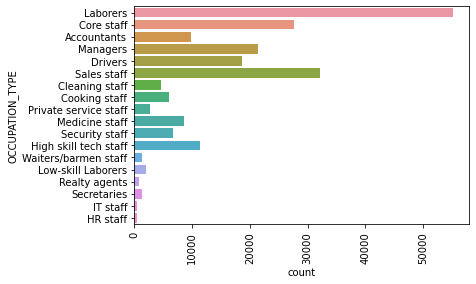

In [14]:
sns.countplot(y="OCCUPATION_TYPE", data=df_ca2)
plt.xticks(rotation=90)
plt.show()

In [15]:
## In Occupation Type columns mode value is Laborers. Which is not value to fill the missing values. 
## Hence categorizing them into Unknown
df_ca2["OCCUPATION_TYPE"].fillna("Unknown",inplace=True)

In [16]:
missing_values=getMissingValues(df_ca2)
missing_values[missing_values>0]

Series([], dtype: float64)

 ### Outlier Check & Treatment

In [17]:
# Getting All numerical Columns
numericalCols=df_ca2.describe().columns
print(len(numericalCols))
numericalCols

print(df_ca2.shape)

68
(307511, 81)


In [18]:
# Getting All Categorial Columns
categoricalCols=list(set(df_ca2.columns)-set(df_ca2.describe().columns))
print(len(categoricalCols))
categoricalCols

13


['ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'CODE_GENDER',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_FAMILY_STATUS',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR']

Plot for ORGANIZATION_TYPE


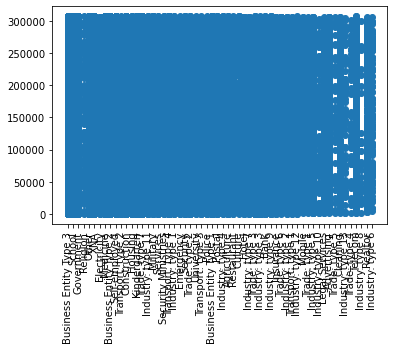

**************************************************
Plot for EMERGENCYSTATE_MODE
EMERGENCYSTATE_MODE is representing categorical value where only 2 vaue possible.Hence No outlier
**************************************************
Plot for CODE_GENDER


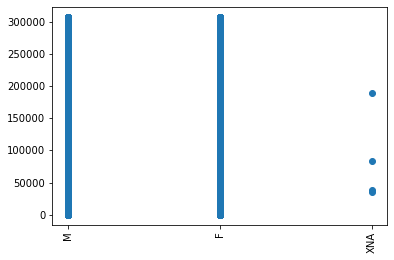

**************************************************
Plot for NAME_HOUSING_TYPE


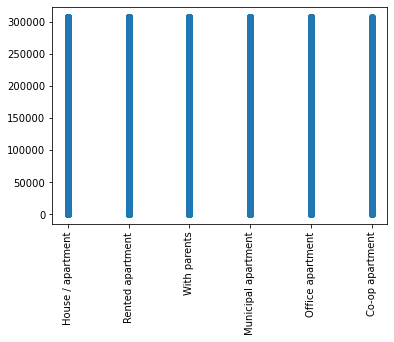

**************************************************
Plot for FLAG_OWN_REALTY
FLAG_OWN_REALTY is representing categorical value where only 2 vaue possible.Hence No outlier
**************************************************
Plot for WEEKDAY_APPR_PROCESS_START


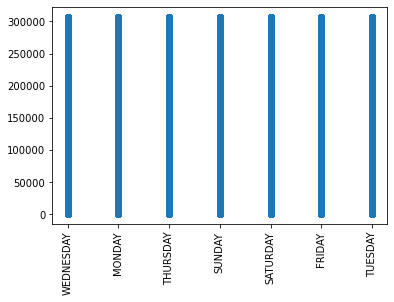

**************************************************
Plot for NAME_FAMILY_STATUS


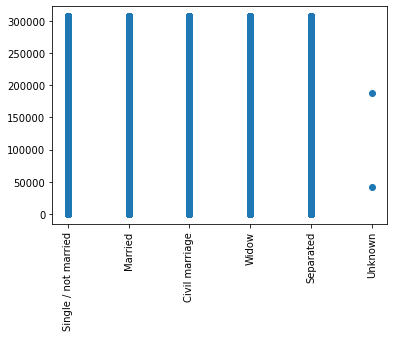

**************************************************
Plot for NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE is representing categorical value where only 2 vaue possible.Hence No outlier
**************************************************
Plot for NAME_TYPE_SUITE


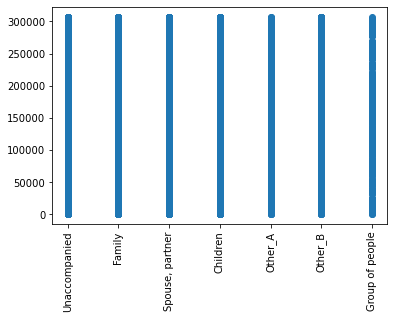

**************************************************
Plot for OCCUPATION_TYPE


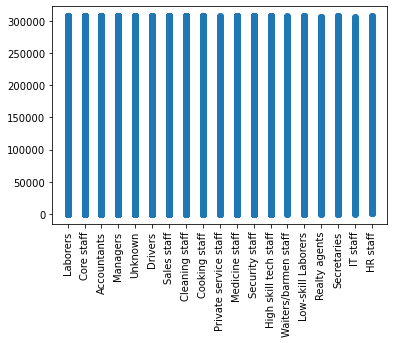

**************************************************
Plot for NAME_INCOME_TYPE


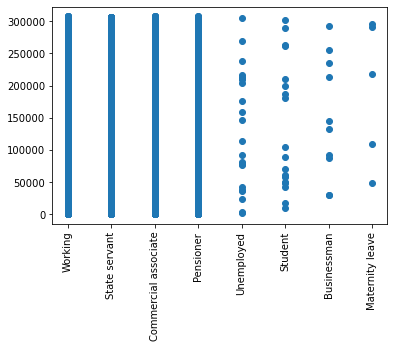

**************************************************
Plot for NAME_EDUCATION_TYPE


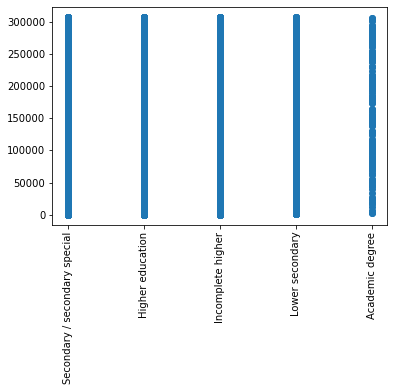

**************************************************
Plot for FLAG_OWN_CAR
FLAG_OWN_CAR is representing categorical value where only 2 vaue possible.Hence No outlier
**************************************************


In [19]:
### Plotting scatterplot for Categorical columns to identify the Outlier
for col in categoricalCols:
    print("Plot for "+col)
    if df_ca2[col].value_counts().count()>2:
        plt.scatter( df_ca2[col],df_ca2.index)
        plt.xticks(rotation=90)
        plt.show()
        print("*"*50)
    else:
        print(col+" is representing categorical value where only 2 vaue possible.Hence No outlier")
        print("*"*50)

In [20]:
print(df_ca2.NAME_INCOME_TYPE.value_counts())
print(df_ca2.CODE_GENDER.value_counts())
print(df_ca2.NAME_FAMILY_STATUS.value_counts())

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


In [21]:
# NAME_INCOME_TYPE-- Maternity Leave doesn't looks like a Income_type . Hence updating that with  mode value that is Working
df_ca2["NAME_INCOME_TYPE"]=df_ca2.NAME_INCOME_TYPE.apply(lambda x: df_ca2.NAME_INCOME_TYPE.mode()[0] if x=='Maternity leave' else x)
# CODE_GENDER-- It could be possible XNA is pointing to other if Gender is not Male or Female . Hence keeping that as it is.
# NAME_FAMILY_STATUS-- It could be possible FAMILY_STATUS is unknown for certain person. Hence keeping that as it is


Plot for SK_ID_CURR


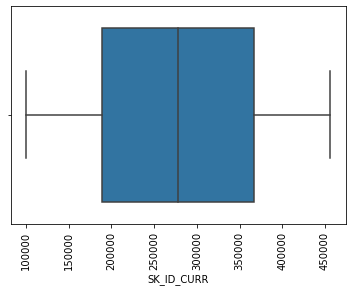

**************************************************
Plot for TARGET
TARGET is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for CNT_CHILDREN


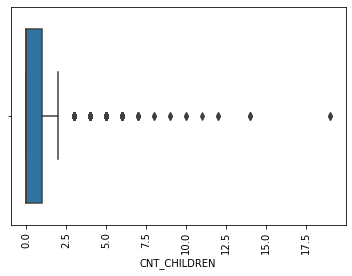

**************************************************
Plot for AMT_INCOME_TOTAL


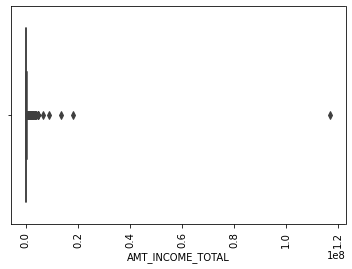

**************************************************
Plot for AMT_CREDIT


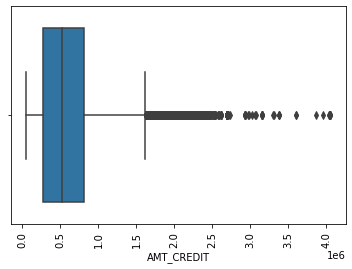

**************************************************
Plot for AMT_ANNUITY


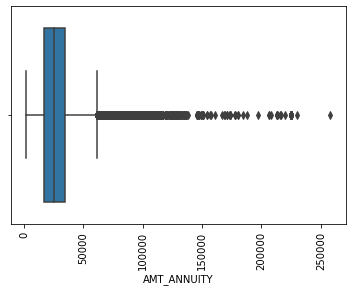

**************************************************
Plot for AMT_GOODS_PRICE


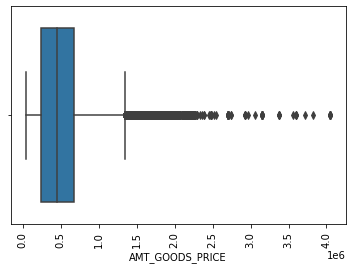

**************************************************
Plot for REGION_POPULATION_RELATIVE


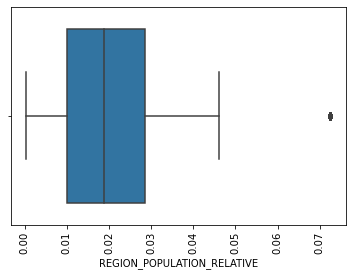

**************************************************
Plot for DAYS_BIRTH


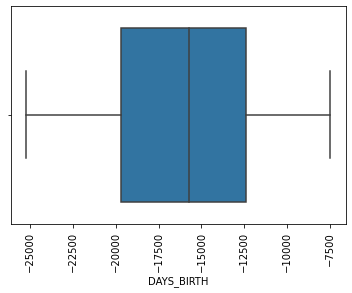

**************************************************
Plot for DAYS_EMPLOYED


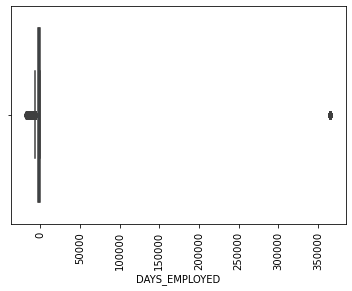

**************************************************
Plot for DAYS_REGISTRATION


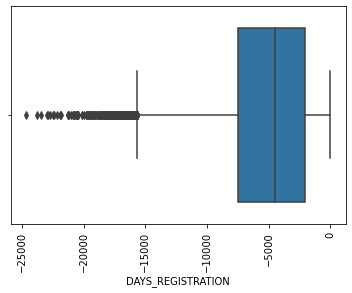

**************************************************
Plot for DAYS_ID_PUBLISH


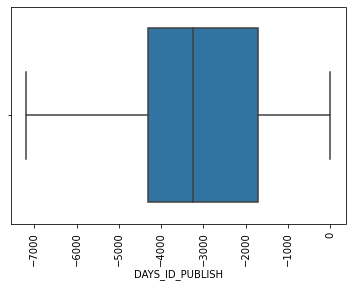

**************************************************
Plot for FLAG_MOBIL
FLAG_MOBIL is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_EMP_PHONE
FLAG_EMP_PHONE is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_WORK_PHONE
FLAG_WORK_PHONE is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_CONT_MOBILE
FLAG_CONT_MOBILE is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_PHONE
FLAG_PHONE is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_EMAIL
FLAG_EMAIL is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for CNT_FAM_MEMBERS


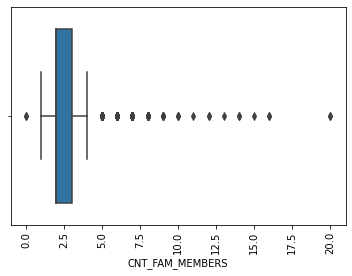

**************************************************
Plot for REGION_RATING_CLIENT


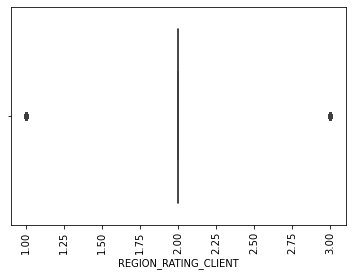

**************************************************
Plot for REGION_RATING_CLIENT_W_CITY


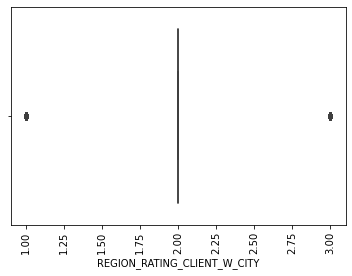

**************************************************
Plot for HOUR_APPR_PROCESS_START


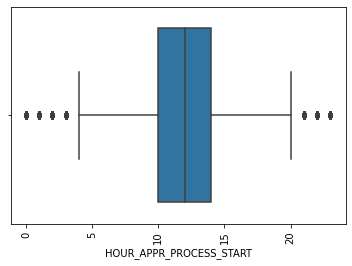

**************************************************
Plot for REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_LIVE_REGION is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for REG_REGION_NOT_WORK_REGION
REG_REGION_NOT_WORK_REGION is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for LIVE_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_LIVE_CITY is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for REG_CITY_NOT_WORK_CITY
REG_CITY_NOT_WORK_CITY is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for LIVE_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY is rep

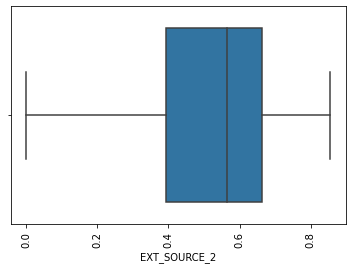

**************************************************
Plot for EXT_SOURCE_3


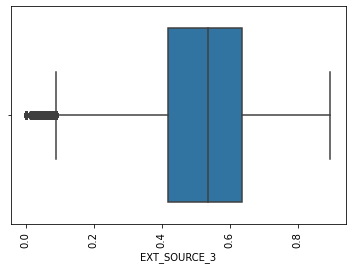

**************************************************
Plot for YEARS_BEGINEXPLUATATION_AVG


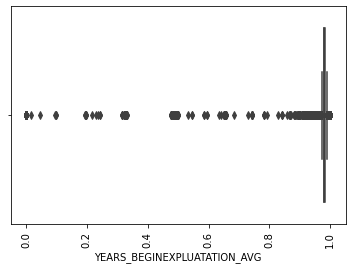

**************************************************
Plot for FLOORSMAX_AVG


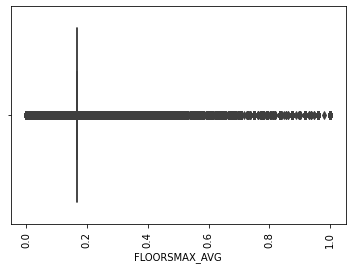

**************************************************
Plot for YEARS_BEGINEXPLUATATION_MODE


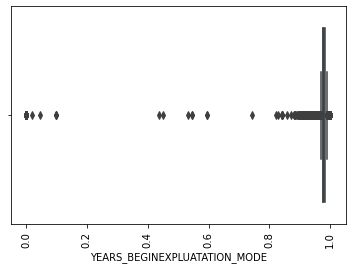

**************************************************
Plot for FLOORSMAX_MODE


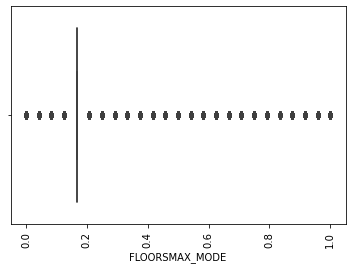

**************************************************
Plot for YEARS_BEGINEXPLUATATION_MEDI


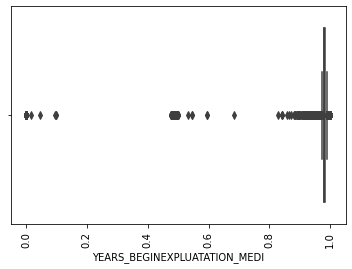

**************************************************
Plot for FLOORSMAX_MEDI


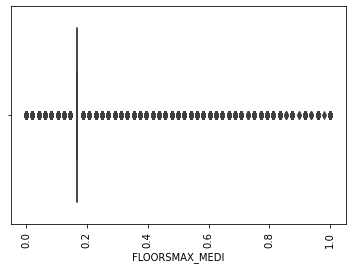

**************************************************
Plot for TOTALAREA_MODE


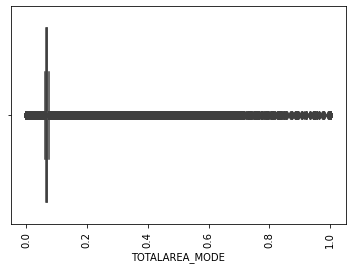

**************************************************
Plot for OBS_30_CNT_SOCIAL_CIRCLE


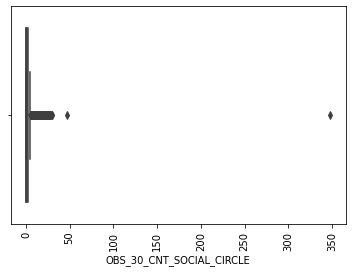

**************************************************
Plot for DEF_30_CNT_SOCIAL_CIRCLE


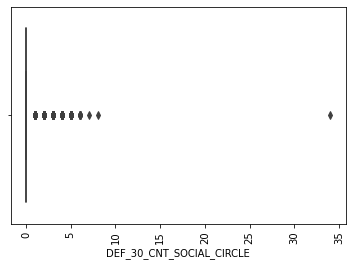

**************************************************
Plot for OBS_60_CNT_SOCIAL_CIRCLE


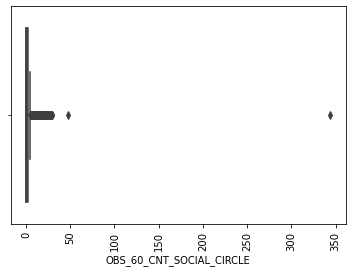

**************************************************
Plot for DEF_60_CNT_SOCIAL_CIRCLE


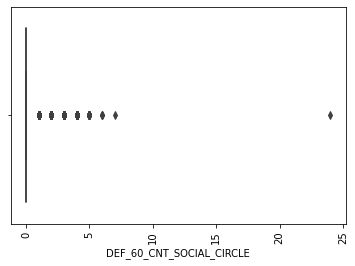

**************************************************
Plot for DAYS_LAST_PHONE_CHANGE


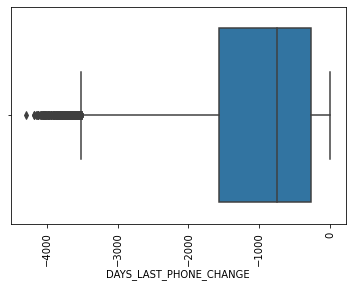

**************************************************
Plot for FLAG_DOCUMENT_2
FLAG_DOCUMENT_2 is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_DOCUMENT_3
FLAG_DOCUMENT_3 is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_DOCUMENT_4
FLAG_DOCUMENT_4 is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_DOCUMENT_5
FLAG_DOCUMENT_5 is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_DOCUMENT_6
FLAG_DOCUMENT_6 is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
Plot for FLAG_DOCUMENT_7
FLAG_DOCUMENT_7 is representing categorical value 'Yes' Or 'No', Hence No outlier
**************************************************
P

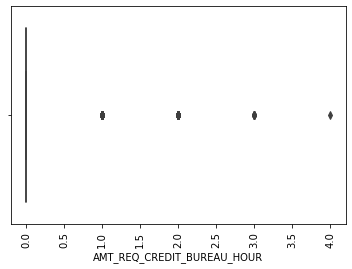

**************************************************
Plot for AMT_REQ_CREDIT_BUREAU_DAY


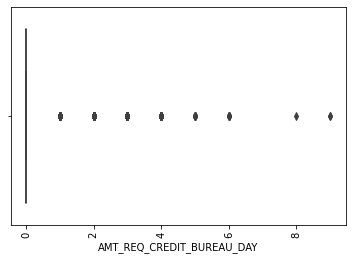

**************************************************
Plot for AMT_REQ_CREDIT_BUREAU_WEEK


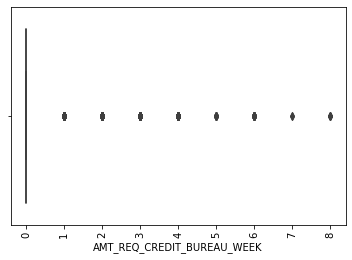

**************************************************
Plot for AMT_REQ_CREDIT_BUREAU_MON


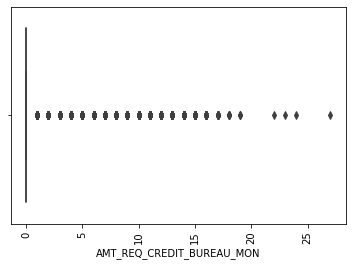

**************************************************
Plot for AMT_REQ_CREDIT_BUREAU_QRT


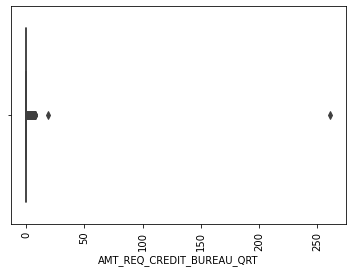

**************************************************
Plot for AMT_REQ_CREDIT_BUREAU_YEAR


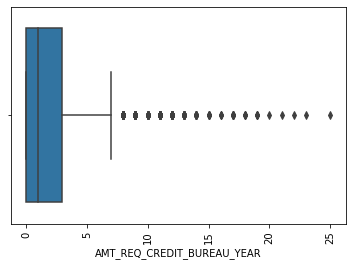

**************************************************


In [22]:
### Plotting boxplot for Numerical columns to identify the Outlier

for col in numericalCols:
    print("Plot for "+col)
    if df_ca2[col].value_counts().count()>2:
        sns.boxplot(df_ca2[col])
        plt.xticks(rotation=90)
        plt.show()
        print("*"*50)
    else:
        print(col+" is representing categorical value 'Yes' Or 'No', Hence No outlier")
        print("*"*50)

In [23]:
##As per Above plots we found below columns could be having Outliers. Hence describing columns to understand more
outlierNumCols=['CNT_CHILDREN','AMT_INCOME_TOTAL','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT']

for oc in outlierNumCols:
    print(df_ca2[oc].describe())

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%         

In [24]:
#As per above detail we found below are outliers
#CNT_CHILDREN column has Outlier value such as more than 10 child  which is not expected value.and also percentage less compare to total records.
#Hence droping those values.
df_ca2=df_ca2[df_ca2["CNT_CHILDREN"]<=10]

#OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT has Outlier value which is not expected value. Hence droping that
df_ca2=df_ca2[~(df_ca2["OBS_30_CNT_SOCIAL_CIRCLE"]==348.0)]
df_ca2=df_ca2[~(df_ca2["AMT_REQ_CREDIT_BUREAU_QRT"]==261.0)]


In [25]:
df_ca2.AMT_INCOME_TOTAL.sort_values(ascending=False).head(60)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
187833      4500000.0
287463      4500000.0
204564      4500000.0
103006      4500000.0
181698      3950059.5
20216       3825000.0
284311      3600000.0
49645       3600000.0
86026       3375000.0
82846       3375000.0
101007      3150000.0
248159      3150000.0
107926      2930026.5
258773      2700000.0
298082      2475000.0
294892      2250000.0
55329       2250000.0
158338      2250000.0
29737       2250000.0
206814      2250000.0
74781       2250000.0
10222       2250000.0
81185       2250000.0
195807      2250000.0
201855      2250000.0
278212      2250000.0
71637       2250000.0
145673      2250000.0
98243       2214117.0
115016      2160000.0
62478       2070000.0
176312      2025000.0
39611       2025000.0
294076      2025000.0
35572       2025000.0
304477      2025000.0
248058      2025000.0
91571       2025000.0
143936      2025000.0
1723        1935000.0
41725     

In [26]:
df_ca2[df_ca2.AMT_INCOME_TOTAL==117000000.0].head()

##This record looks like a outlier for Column AMT_INCOME_TOTAL but it could have other valueable info or could be wrong entry which required further investigation on this. 
##Hence keeping this record as it is.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Target Field Value analysis

In [27]:
### Client with payment difficulties 
df_T1=df_ca2[df_ca2["TARGET"]==1]
print(df_T1.shape)

(24824, 81)


In [28]:
### Others
df_T0=df_ca2[df_ca2["TARGET"]==0]
print(df_T0.shape)

(282677, 81)


### Data imbalance ratio

In [29]:

print(df_T0.shape[0]/df_T1.shape[0])

11.387246213341927


### Univariate Analysis w.r.t Traget field

In [30]:
def uniAnalysis(dfca, dfT0, dfT1, col):
    
    fig=plt.figure(figsize=(14,13))
    
    ax1=plt.subplot(221)
    sns.countplot(x=col, hue='TARGET', data=dfca,ax=ax1)
    plt.xticks(rotation=90)
    plt.title("Plotting data for Target in terms of Total Count")
    
    ax2=plt.subplot(222)
    df=pd.DataFrame()
    df['0']=((dfT0[col].value_counts())/len(dfT0))
    df['1']=((dfT1[col].value_counts())/len(dfT1))
    df.plot.bar(ax=ax2)
    plt.title("Plotting data for Target in terms of Percentage with respect to The Column")
    
    plt.tight_layout()
    plt.show()

Plot for ORGANIZATION_TYPE


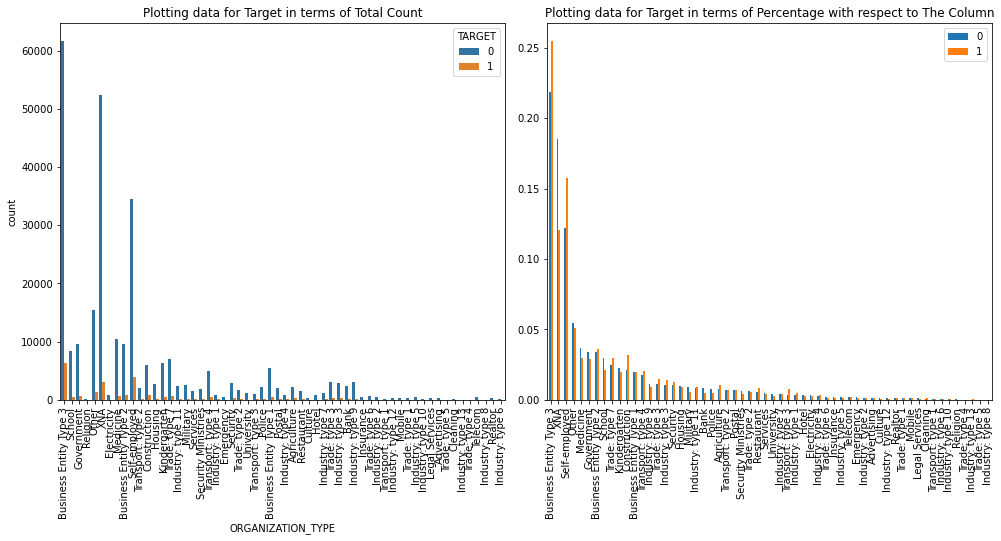

******************************************************************************************************************************************************
Plot for EMERGENCYSTATE_MODE


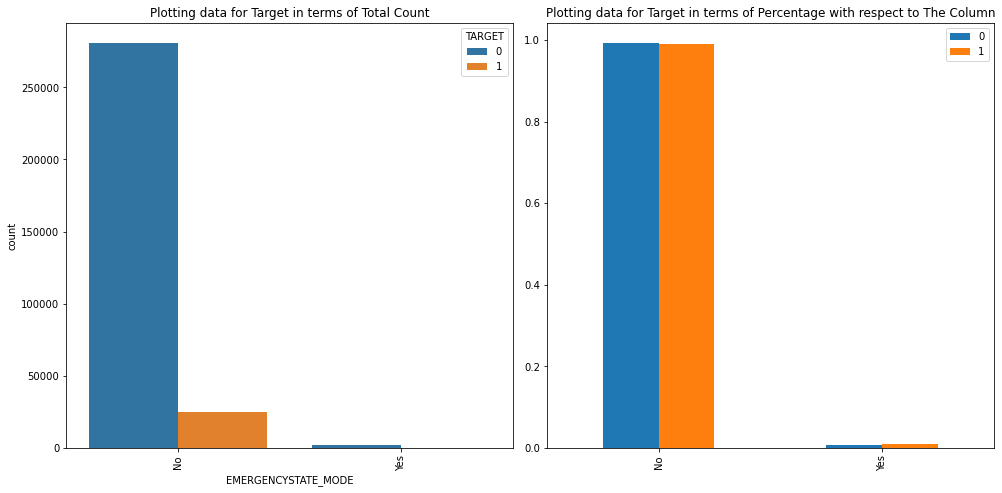

******************************************************************************************************************************************************
Plot for CODE_GENDER


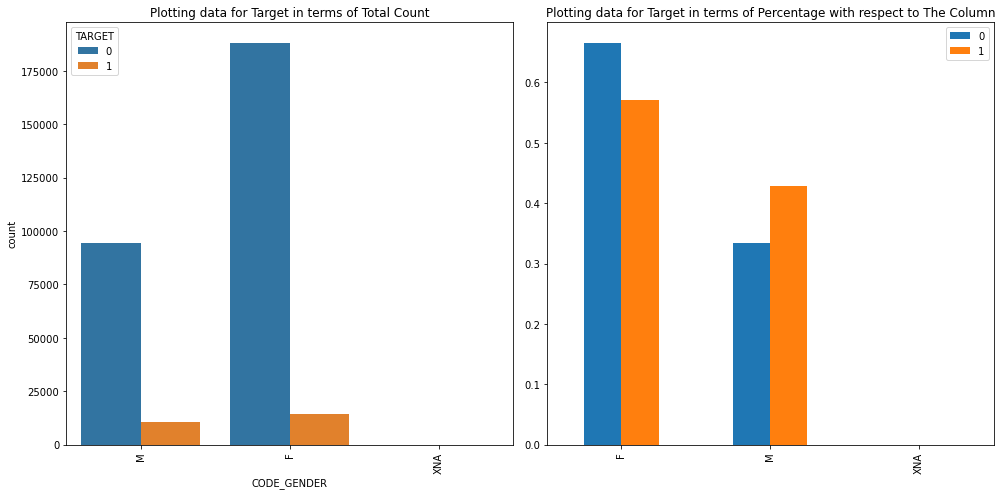

******************************************************************************************************************************************************
Plot for NAME_HOUSING_TYPE


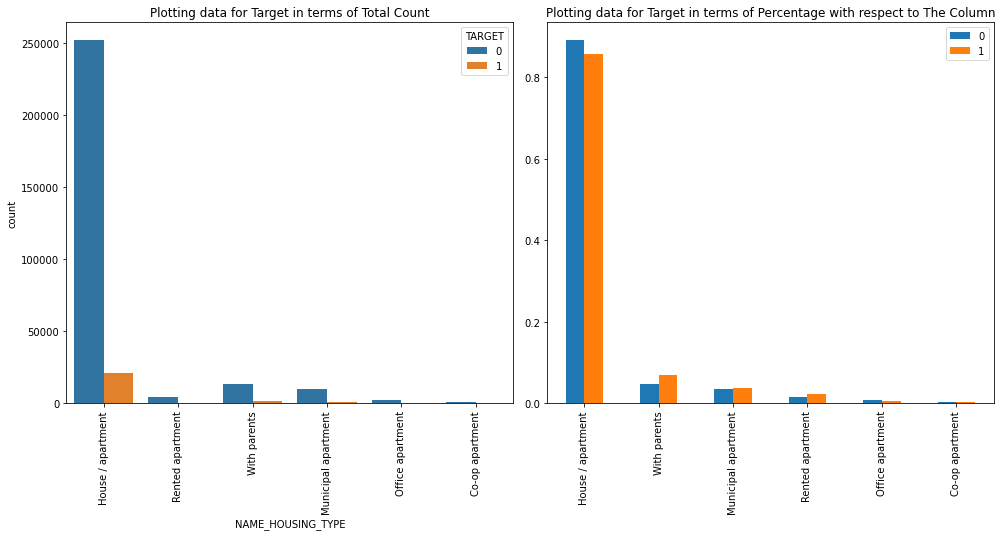

******************************************************************************************************************************************************
Plot for FLAG_OWN_REALTY


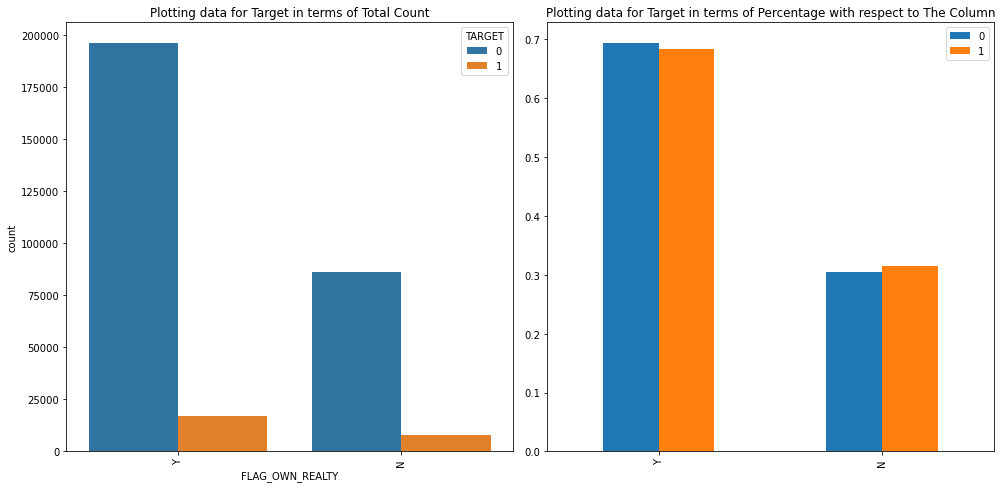

******************************************************************************************************************************************************
Plot for WEEKDAY_APPR_PROCESS_START


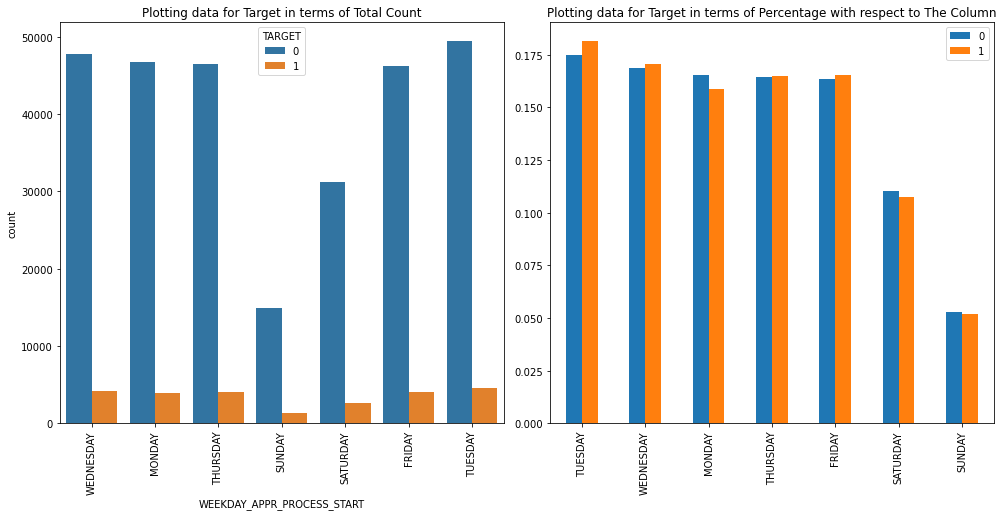

******************************************************************************************************************************************************
Plot for NAME_FAMILY_STATUS


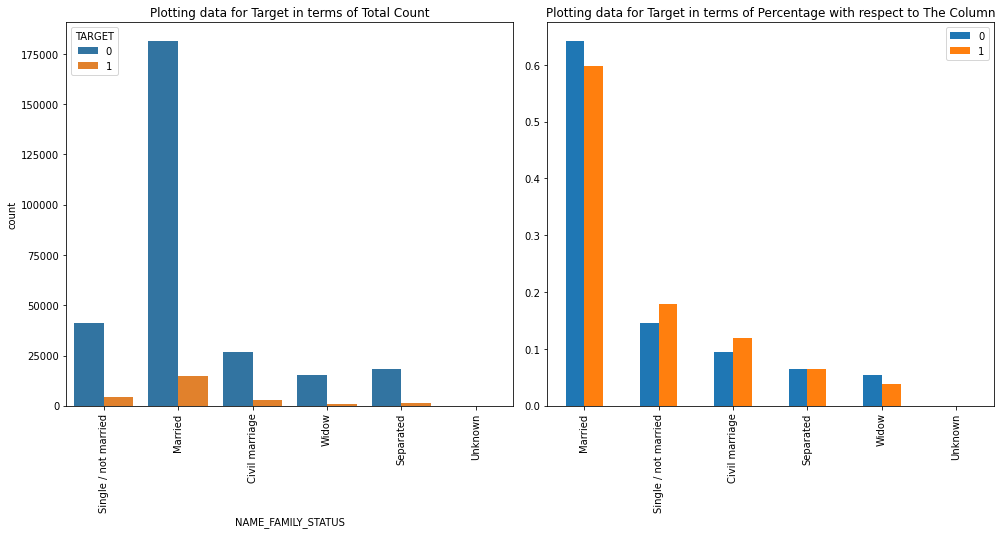

******************************************************************************************************************************************************
Plot for NAME_CONTRACT_TYPE


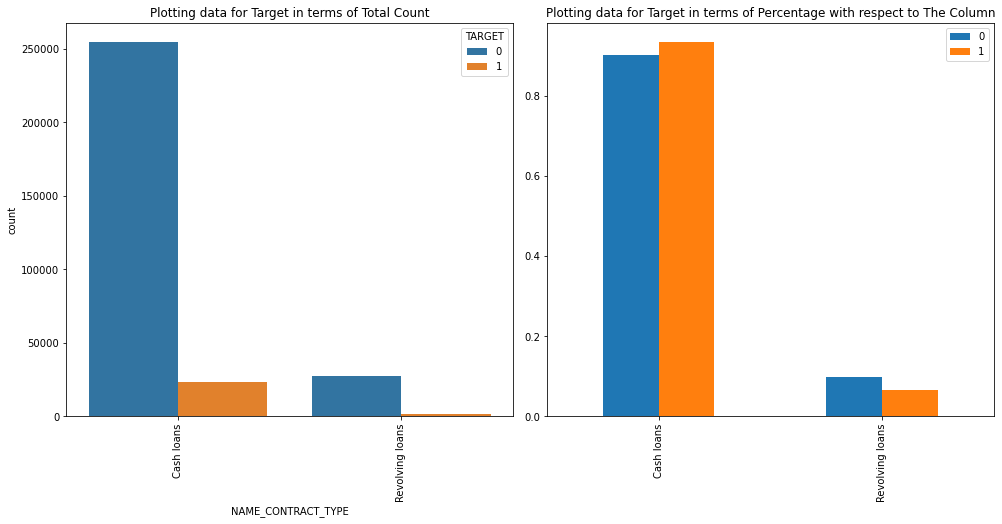

******************************************************************************************************************************************************
Plot for NAME_TYPE_SUITE


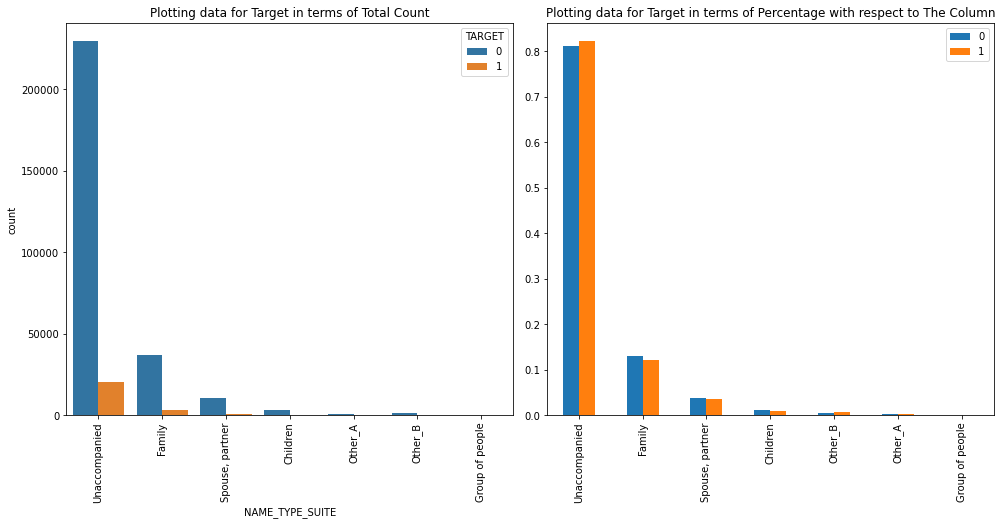

******************************************************************************************************************************************************
Plot for OCCUPATION_TYPE


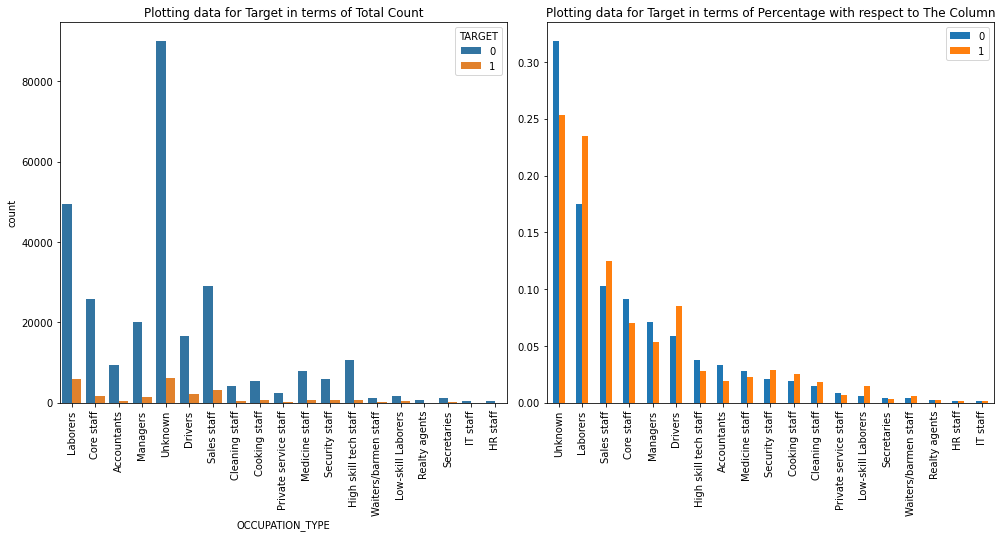

******************************************************************************************************************************************************
Plot for NAME_INCOME_TYPE


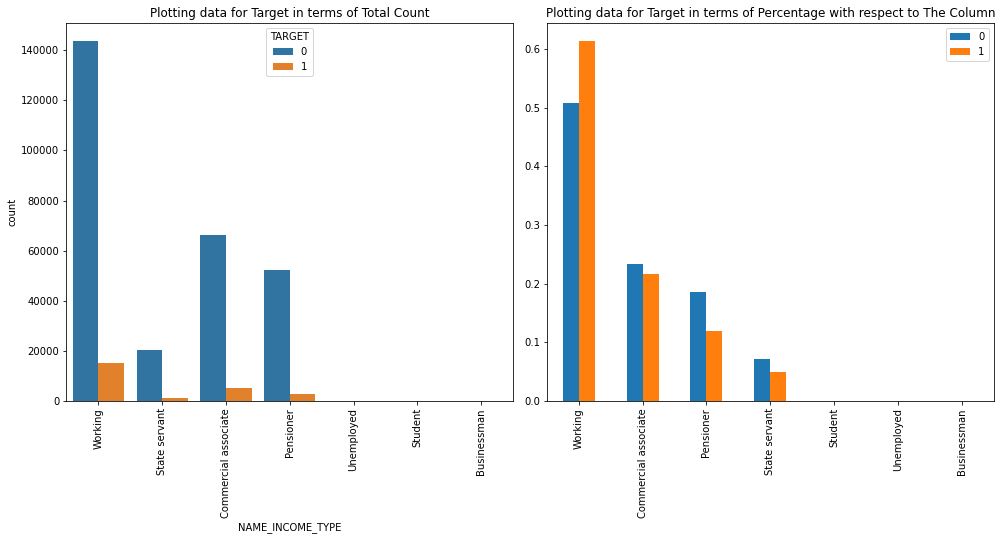

******************************************************************************************************************************************************
Plot for NAME_EDUCATION_TYPE


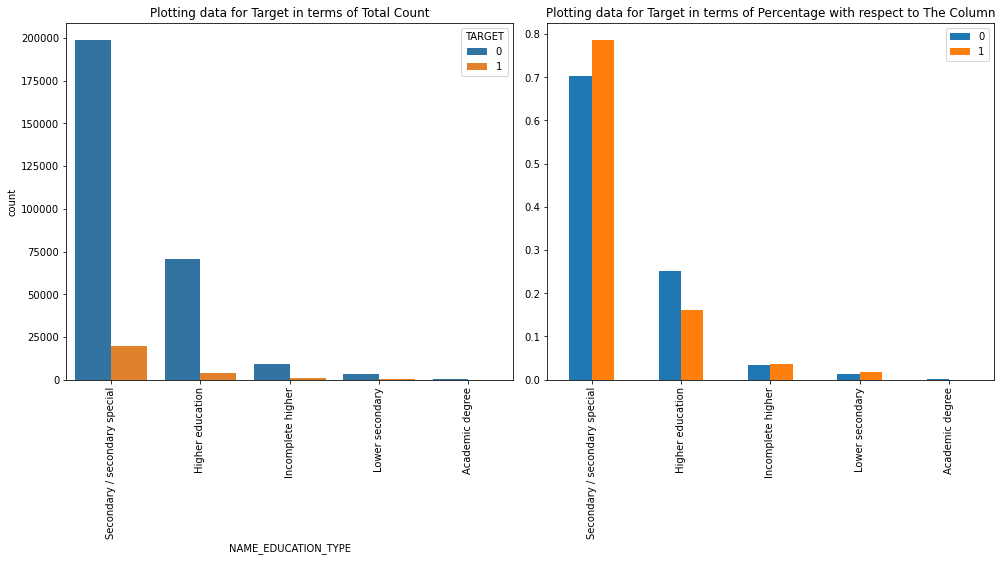

******************************************************************************************************************************************************
Plot for FLAG_OWN_CAR


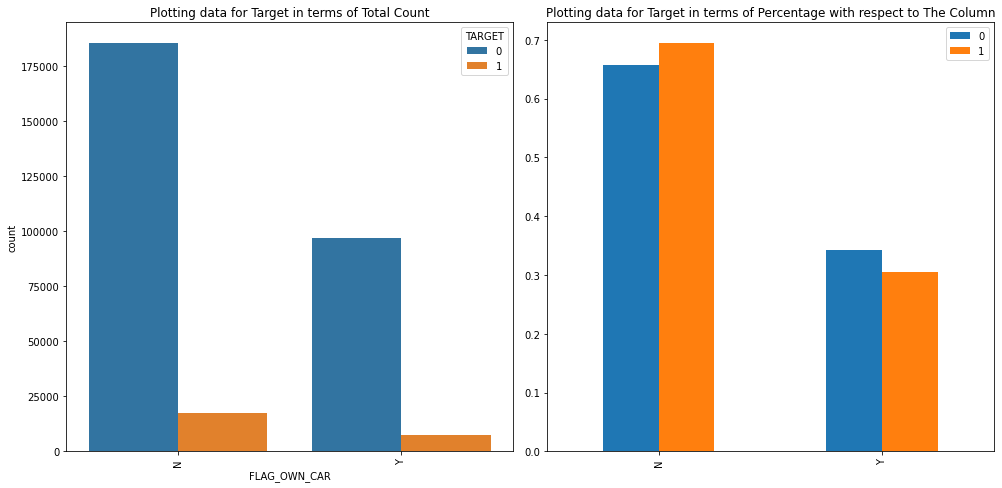

******************************************************************************************************************************************************


In [31]:
for col in categoricalCols:
    print("Plot for "+col)
    uniAnalysis(df_ca2, df_T0, df_T1, col)
    print("*"*150)

Plot of SK_ID_CURR


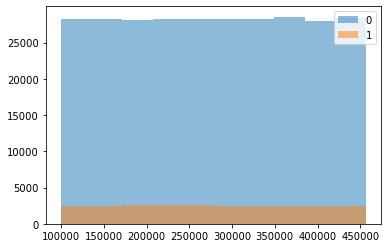

****************************************************************************************************
Plot of TARGET


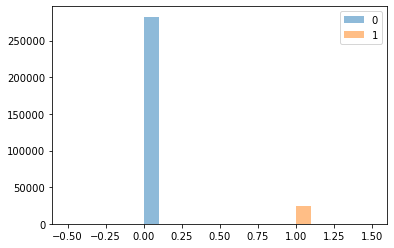

****************************************************************************************************
Plot of CNT_CHILDREN


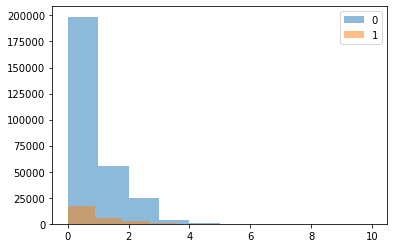

****************************************************************************************************
Plot of AMT_INCOME_TOTAL


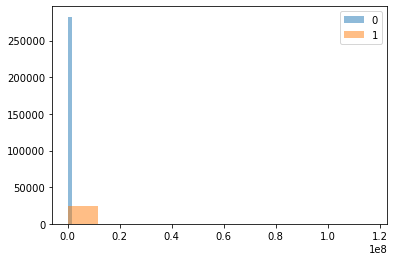

****************************************************************************************************
Plot of AMT_CREDIT


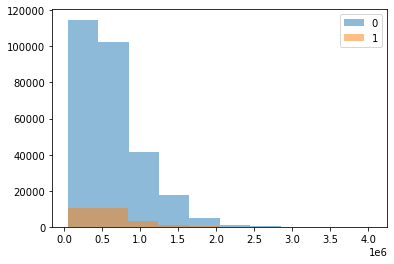

****************************************************************************************************
Plot of AMT_ANNUITY


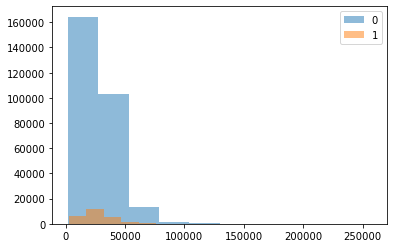

****************************************************************************************************
Plot of AMT_GOODS_PRICE


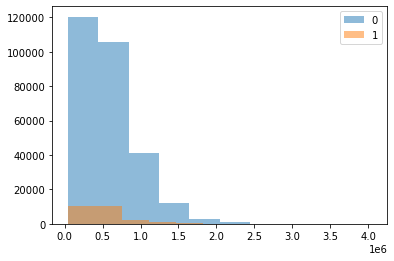

****************************************************************************************************
Plot of REGION_POPULATION_RELATIVE


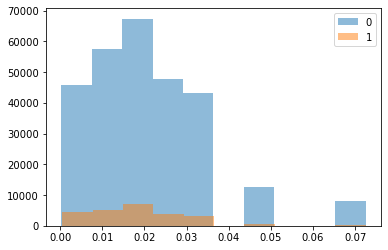

****************************************************************************************************
Plot of DAYS_BIRTH


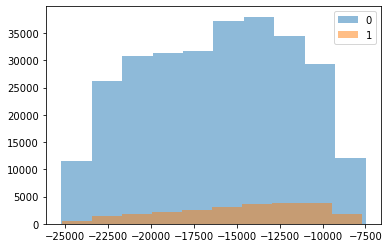

****************************************************************************************************
Plot of DAYS_EMPLOYED


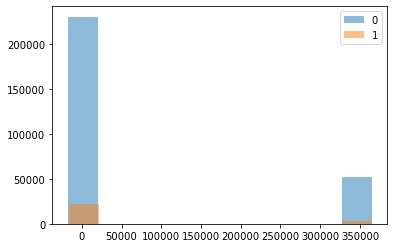

****************************************************************************************************
Plot of DAYS_REGISTRATION


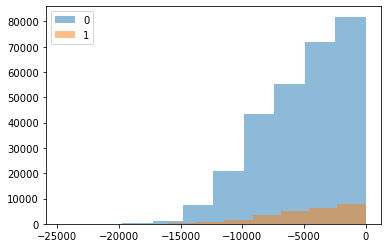

****************************************************************************************************
Plot of DAYS_ID_PUBLISH


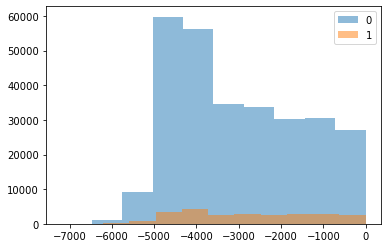

****************************************************************************************************
Plot of FLAG_MOBIL


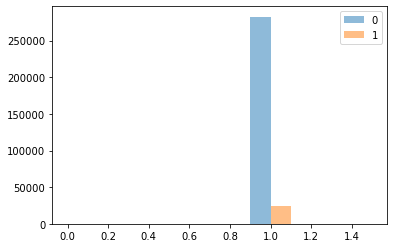

****************************************************************************************************
Plot of FLAG_EMP_PHONE


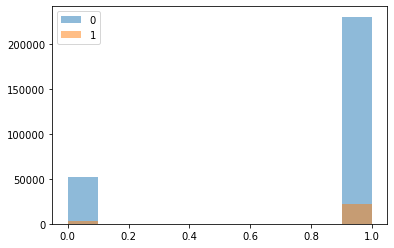

****************************************************************************************************
Plot of FLAG_WORK_PHONE


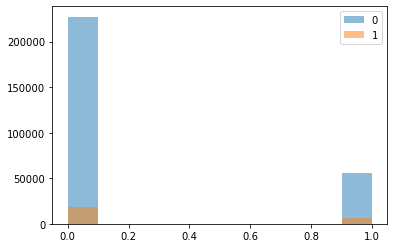

****************************************************************************************************
Plot of FLAG_CONT_MOBILE


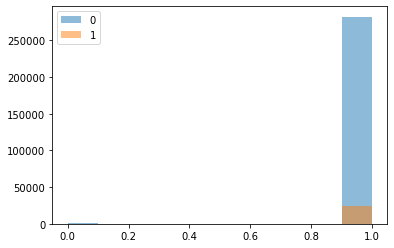

****************************************************************************************************
Plot of FLAG_PHONE


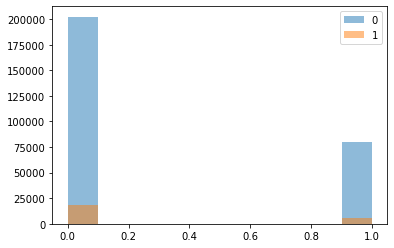

****************************************************************************************************
Plot of FLAG_EMAIL


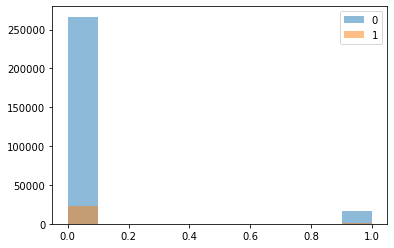

****************************************************************************************************
Plot of CNT_FAM_MEMBERS


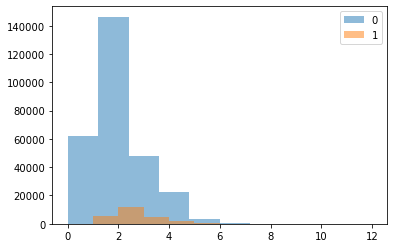

****************************************************************************************************
Plot of REGION_RATING_CLIENT


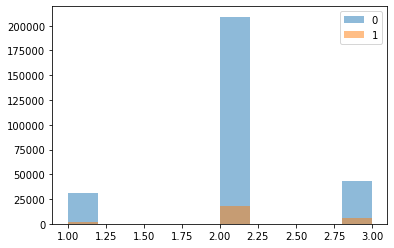

****************************************************************************************************
Plot of REGION_RATING_CLIENT_W_CITY


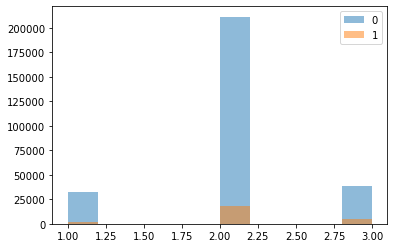

****************************************************************************************************
Plot of HOUR_APPR_PROCESS_START


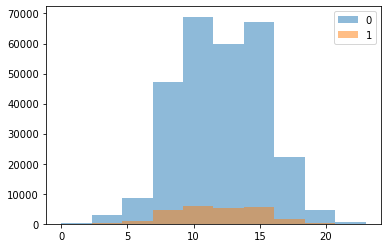

****************************************************************************************************
Plot of REG_REGION_NOT_LIVE_REGION


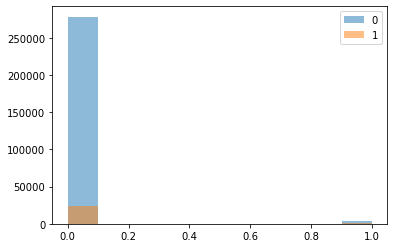

****************************************************************************************************
Plot of REG_REGION_NOT_WORK_REGION


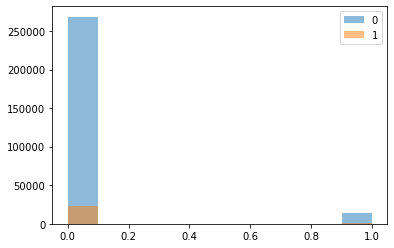

****************************************************************************************************
Plot of LIVE_REGION_NOT_WORK_REGION


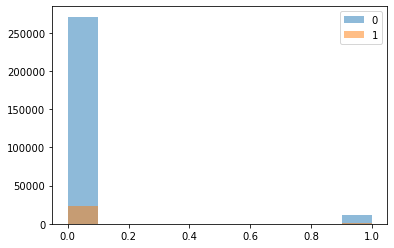

****************************************************************************************************
Plot of REG_CITY_NOT_LIVE_CITY


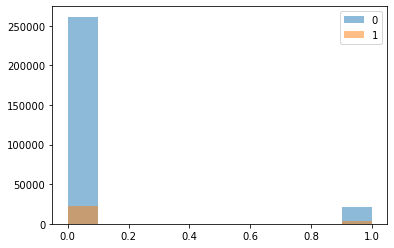

****************************************************************************************************
Plot of REG_CITY_NOT_WORK_CITY


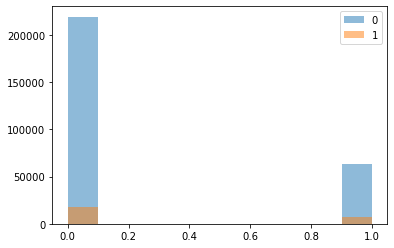

****************************************************************************************************
Plot of LIVE_CITY_NOT_WORK_CITY


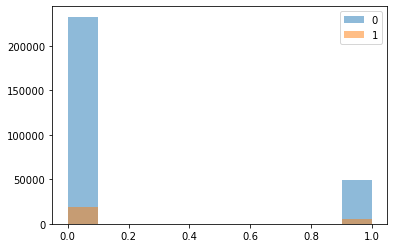

****************************************************************************************************
Plot of EXT_SOURCE_2


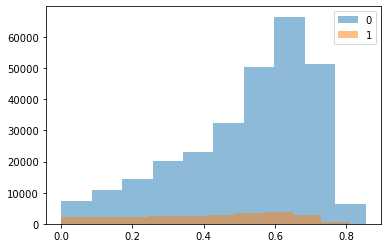

****************************************************************************************************
Plot of EXT_SOURCE_3


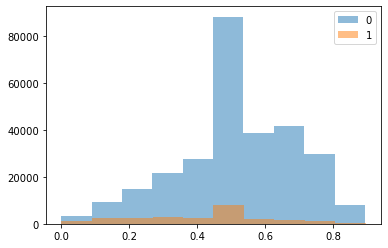

****************************************************************************************************
Plot of YEARS_BEGINEXPLUATATION_AVG


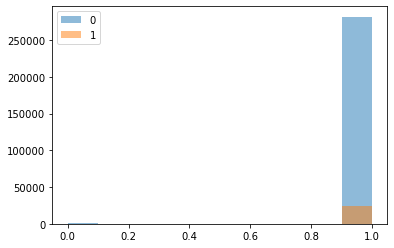

****************************************************************************************************
Plot of FLOORSMAX_AVG


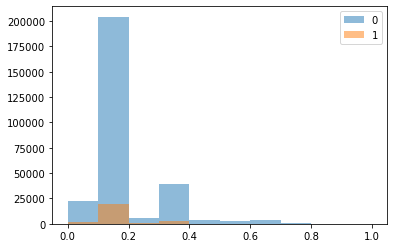

****************************************************************************************************
Plot of YEARS_BEGINEXPLUATATION_MODE


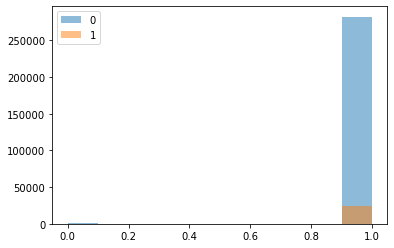

****************************************************************************************************
Plot of FLOORSMAX_MODE


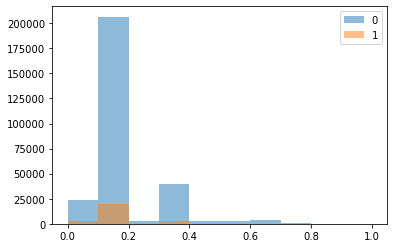

****************************************************************************************************
Plot of YEARS_BEGINEXPLUATATION_MEDI


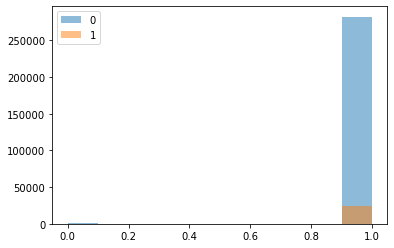

****************************************************************************************************
Plot of FLOORSMAX_MEDI


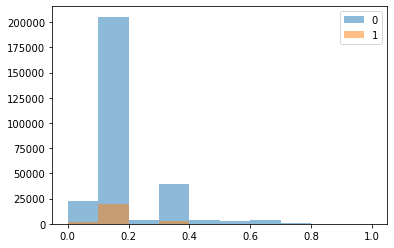

****************************************************************************************************
Plot of TOTALAREA_MODE


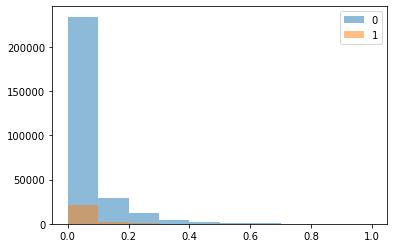

****************************************************************************************************
Plot of OBS_30_CNT_SOCIAL_CIRCLE


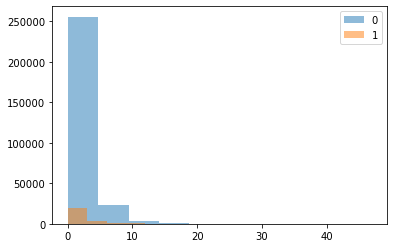

****************************************************************************************************
Plot of DEF_30_CNT_SOCIAL_CIRCLE


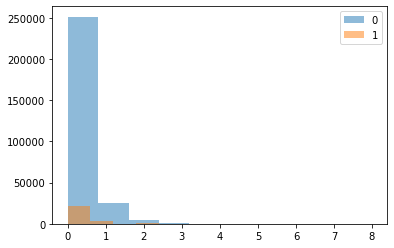

****************************************************************************************************
Plot of OBS_60_CNT_SOCIAL_CIRCLE


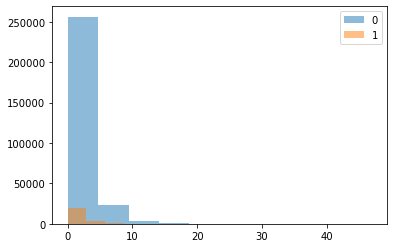

****************************************************************************************************
Plot of DEF_60_CNT_SOCIAL_CIRCLE


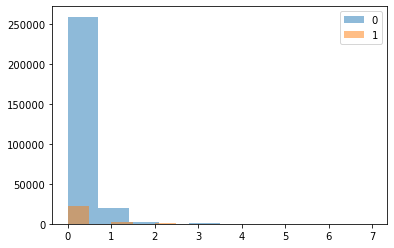

****************************************************************************************************
Plot of DAYS_LAST_PHONE_CHANGE


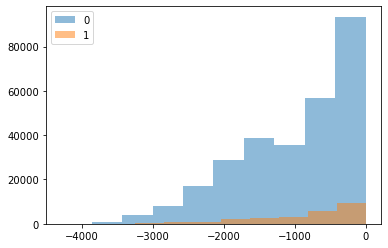

****************************************************************************************************
Plot of FLAG_DOCUMENT_2


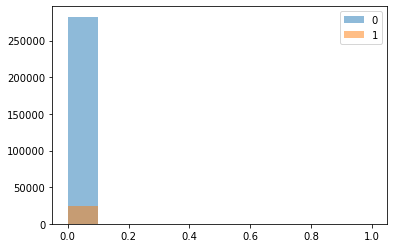

****************************************************************************************************
Plot of FLAG_DOCUMENT_3


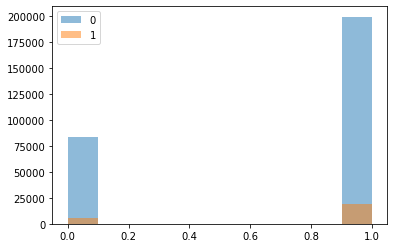

****************************************************************************************************
Plot of FLAG_DOCUMENT_4


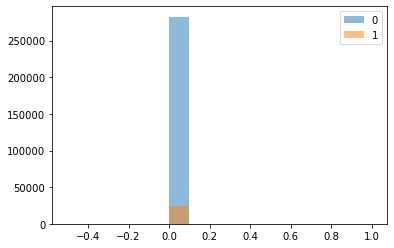

****************************************************************************************************
Plot of FLAG_DOCUMENT_5


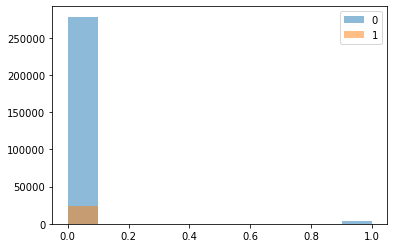

****************************************************************************************************
Plot of FLAG_DOCUMENT_6


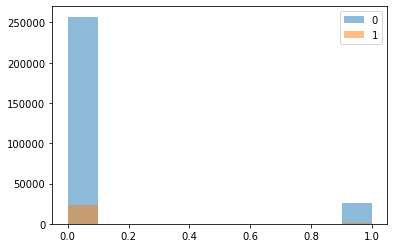

****************************************************************************************************
Plot of FLAG_DOCUMENT_7


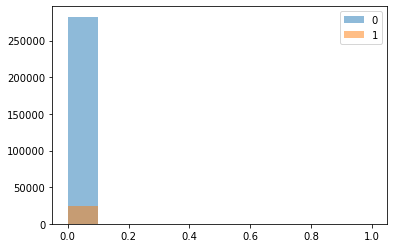

****************************************************************************************************
Plot of FLAG_DOCUMENT_8


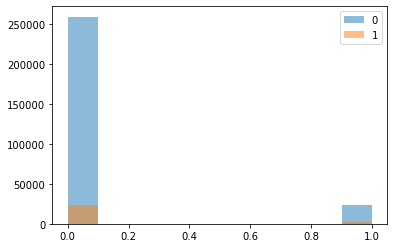

****************************************************************************************************
Plot of FLAG_DOCUMENT_9


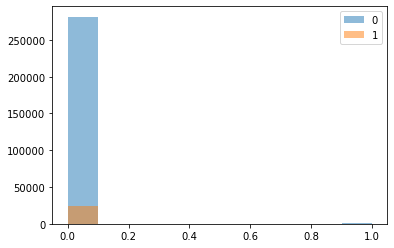

****************************************************************************************************
Plot of FLAG_DOCUMENT_10


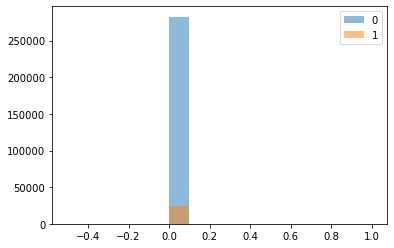

****************************************************************************************************
Plot of FLAG_DOCUMENT_11


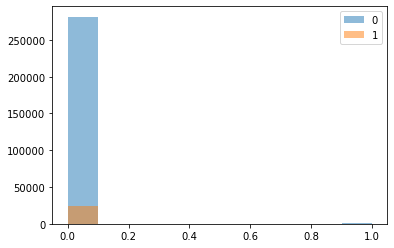

****************************************************************************************************
Plot of FLAG_DOCUMENT_12


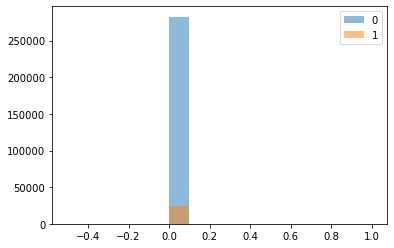

****************************************************************************************************
Plot of FLAG_DOCUMENT_13


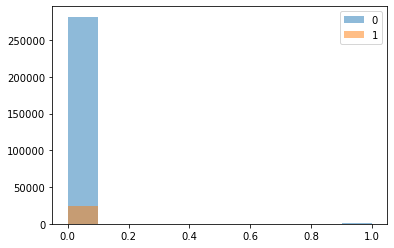

****************************************************************************************************
Plot of FLAG_DOCUMENT_14


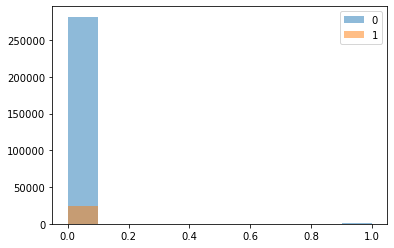

****************************************************************************************************
Plot of FLAG_DOCUMENT_15


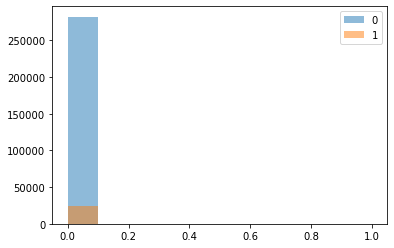

****************************************************************************************************
Plot of FLAG_DOCUMENT_16


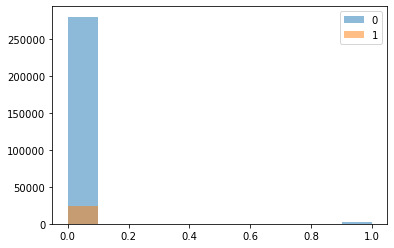

****************************************************************************************************
Plot of FLAG_DOCUMENT_17


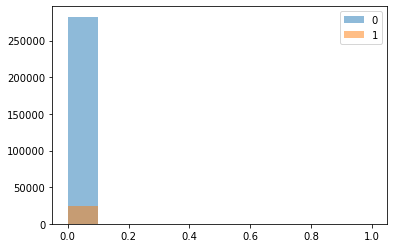

****************************************************************************************************
Plot of FLAG_DOCUMENT_18


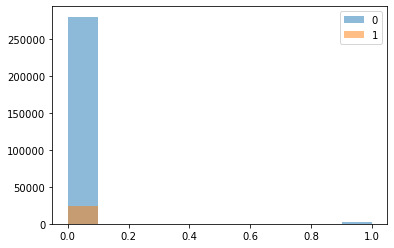

****************************************************************************************************
Plot of FLAG_DOCUMENT_19


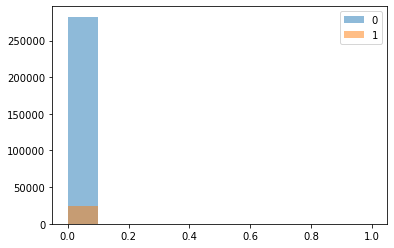

****************************************************************************************************
Plot of FLAG_DOCUMENT_20


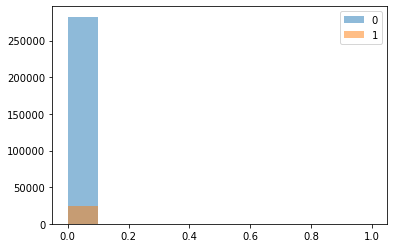

****************************************************************************************************
Plot of FLAG_DOCUMENT_21


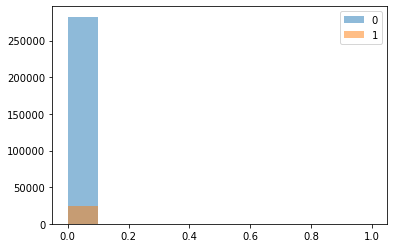

****************************************************************************************************
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


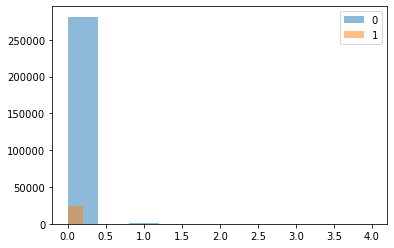

****************************************************************************************************
Plot of AMT_REQ_CREDIT_BUREAU_DAY


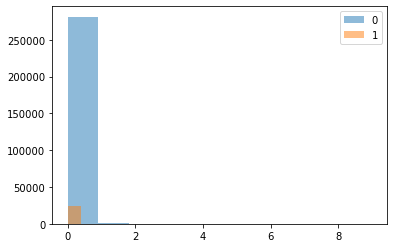

****************************************************************************************************
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


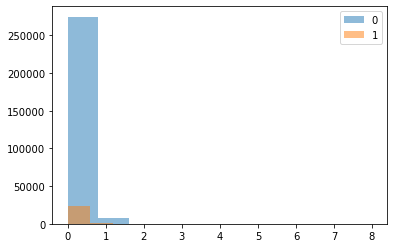

****************************************************************************************************
Plot of AMT_REQ_CREDIT_BUREAU_MON


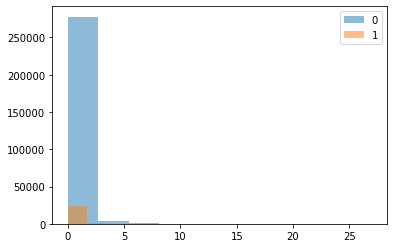

****************************************************************************************************
Plot of AMT_REQ_CREDIT_BUREAU_QRT


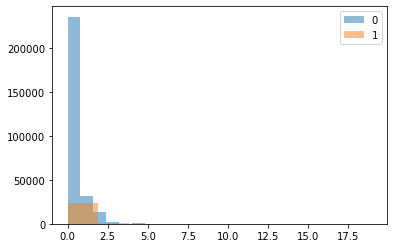

****************************************************************************************************
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


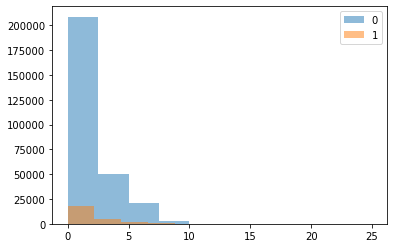

****************************************************************************************************


In [32]:
for col in numericalCols:
    #fig=plt.figure(figsize=(11,8))
    
    print("Plot of "+ col)
    plt.hist(df_T0[col],alpha=0.5, label='0')
    plt.hist(df_T1[col],alpha=0.5, label='1')
    plt.legend()
    plt.show()
    
#     sns.distplot(df_T0[col].dropna(),label='0')
#     sns.distplot(df_T1[col].dropna(),label='1')
#     plt.show()
    print("*"*100)
    

# Correlation matrix

In [33]:
##Corrleation for Target 0(Others)
corr=df_T0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000930,0.001745,-0.000341,0.000079,-0.000206,0.000368,-0.001352,0.001746,...,0.001195,0.000676,0.000833,-0.000485,-0.001773,-0.001625,0.002301,-0.000034,-0.000276,0.003522
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000930,NaN,1.000000,0.027626,0.003195,0.021045,-0.000435,-0.024513,0.338524,-0.244567,...,0.004249,0.001096,0.001320,-0.002989,0.000183,0.001091,-0.000228,-0.007612,-0.006691,-0.030761
AMT_INCOME_TOTAL,0.001745,NaN,0.027626,1.000000,0.342800,0.418948,0.349363,0.167831,0.062604,-0.141241,...,0.008215,0.005762,0.000840,-0.000869,0.002707,0.008030,0.008642,0.058670,0.020459,0.042528
AMT_CREDIT,-0.000341,NaN,0.003195,0.342800,1.000000,0.771298,0.986880,0.100603,-0.047363,-0.072522,...,0.035527,0.021560,0.032151,-0.015602,-0.002267,0.005135,0.000960,0.055062,0.026977,-0.027591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.001625,NaN,0.001091,0.008030,0.005135,0.002464,0.005507,0.001629,0.001588,-0.000909,...,0.013464,0.001353,0.000215,-0.001029,0.229543,1.000000,0.221006,-0.002350,-0.002573,0.004233
AMT_REQ_CREDIT_BUREAU_WEEK,0.002301,NaN,-0.000228,0.008642,0.000960,0.012408,0.001194,-0.002812,-0.003593,0.001711,...,-0.003511,-0.000824,-0.001038,0.000363,0.006244,0.221006,1.000000,-0.007774,-0.010397,0.038829
AMT_REQ_CREDIT_BUREAU_MON,-0.000034,NaN,-0.007612,0.058670,0.055062,0.036289,0.056640,0.071489,-0.001877,-0.033649,...,-0.001083,-0.002016,0.002239,-0.003189,0.003432,-0.002350,-0.007774,1.000000,0.004448,0.031753
AMT_REQ_CREDIT_BUREAU_QRT,-0.000276,NaN,-0.006691,0.020459,0.026977,0.014971,0.026954,-0.003183,-0.021208,0.018205,...,-0.004419,-0.001334,-0.000244,-0.002937,0.000064,-0.002573,-0.010397,0.004448,1.000000,0.146862


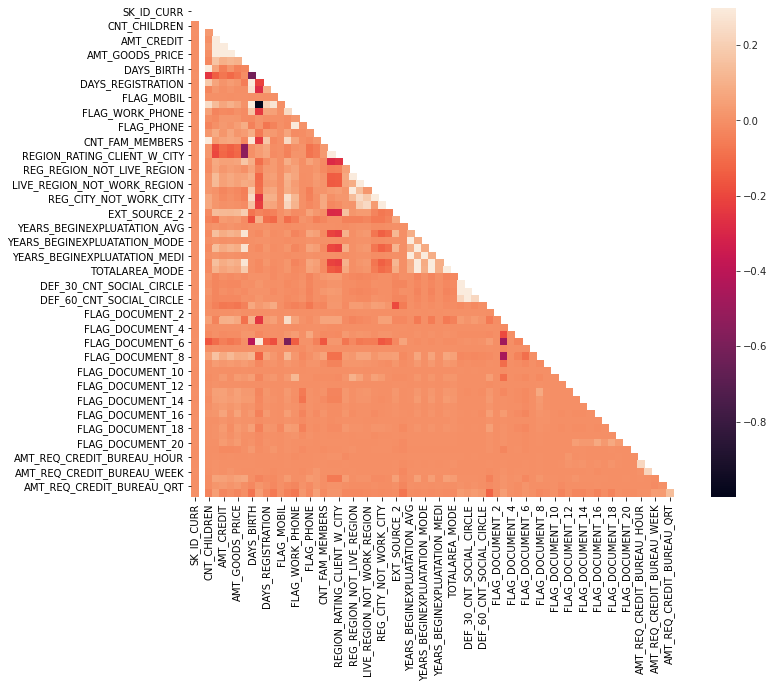

In [34]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
mask
f,ax=plt.subplots(figsize=(11,9))
with sns.axes_style('white'):
    ax=sns.heatmap(corr,mask=mask,vmax=.3, square=True)
plt.show()

In [35]:
### Above taking absolute value because coefficient could be in +ve and -ve both hence to get top 10 we need absolute value
corr_0=df_T0.corr().abs().unstack().sort_values().dropna()

### removing relation for coefficient value ==1 as it's the relation between same column in x and y axis.
corr_0=corr_0[corr_0!=1]

### Top 10 Correleation variables where Traget 0

In [36]:
corr_0.sort_values(ascending=False).head(20)

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999758
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998392
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998392
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997254
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997254
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988955
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988955
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986880
AMT_GOODS_PRICE               AMT_CREDIT                      0.986880
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986572
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986572
YEARS_

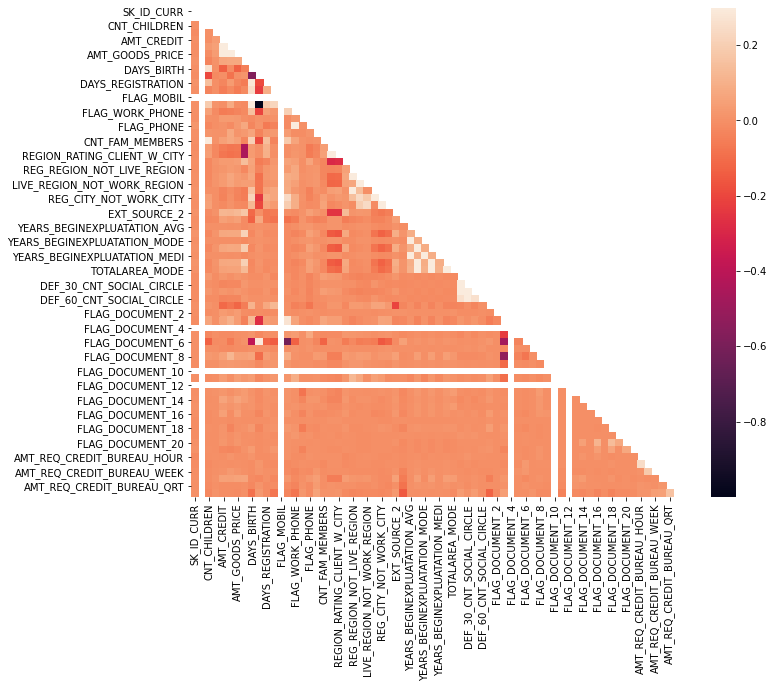

In [37]:
##Corrleation for Target 1(Having Payment Difficulties)
corr_1=df_T1.corr()
fig=plt.figure(figsize=(11,9))
sns.heatmap(corr_1,mask=mask,vmax=.3, square=True)
plt.show()

In [38]:
### Above taking absolute value because coefficient could be in +ve and -ve both hence to get top 10 we need absolute value
corr_1=df_T1.corr().abs().unstack().sort_values().dropna()

### removing relation for coefficient value ==1 as it's the relation between same column in x and y axis.
corr_1=corr_1[corr_1!=1]

### Top 10 Correleation variables for Target 1

In [39]:
corr_1.sort_values(ascending=False).head(20)

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999702
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997295
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997295
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996125
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996125
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989472
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989472
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986935
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986935
AMT_GOODS_PRICE               AMT_CREDIT                      0.982565
AMT_CREDIT                    AMT_GOODS_PRICE                 0.982565
YEARS_

## Converting Numerical Column to Categorical

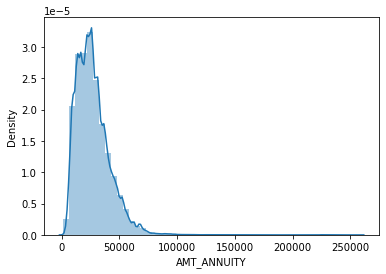

In [40]:
sns.distplot(df_ca2['AMT_ANNUITY'].dropna())
plt.show()

In [41]:
df_ca2["AMT_ANNUITY_CATEGORY"]=pd.cut(x=df_ca2["AMT_ANNUITY"],bins=(0,10000,20000,30000,40000,250000), labels=('Very Low','Low','Medium','High', 'Very High'))
df_ca2["AMT_ANNUITY_CATEGORY"].value_counts()

Medium       92476
Low          83220
High         58560
Very High    49963
Very Low     23281
Name: AMT_ANNUITY_CATEGORY, dtype: int64

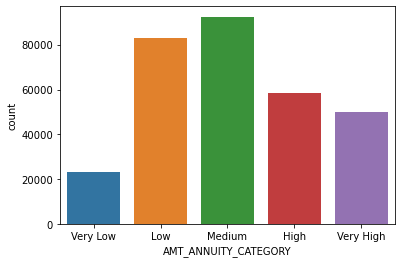

In [42]:
sns.countplot(x="AMT_ANNUITY_CATEGORY", data=df_ca2 )
plt.show()

### Merging two Data set(Prev Application ,Current Application)

In [43]:
df_pa=pd.read_csv("previous_application.csv")
df_pa.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [45]:
print("Current Application Total Records: ",df_ca2.SK_ID_CURR.count())
print("Previous Application Total Records: ",df_pa.SK_ID_CURR.count())


Current Application Total Records:  307501
Previous Application Total Records:  1670214


In [46]:
print("Total Duplicated record in Previous_Application dataset ", df_pa[df_pa.SK_ID_CURR.duplicated()].shape[0])


Total Duplicated record in Previous_Application dataset  1331357


In [47]:
mergedApplicationData=pd.merge(df_ca2,df_pa, on="SK_ID_CURR", how="inner")
mergedApplicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [48]:
mergedApplicationData.shape

(1413670, 118)

In [49]:
### Current Application Defaulters
df_CAT1=df_ca2[df_ca2["TARGET"]==1]
print(df_CAT1.shape)

# Previous Application Defaulters
df_PAT1=mergedApplicationData[mergedApplicationData["TARGET"]==1]
print(df_PAT1.shape)

### Current Application Others
df_CAT0=df_ca2[df_ca2["TARGET"]==0]
print(df_CAT0.shape)

# Previous Application Others
df_PAT0=mergedApplicationData[mergedApplicationData["TARGET"]==0]
print(df_PAT0.shape)

(24824, 82)
(122357, 118)
(282677, 82)
(1291313, 118)


## Bivariate Analysis
    

In [50]:
def plotBivariateAnalysis(col, hue):
    
    fig=plt.figure(figsize=(14,11))
    
    ax1=plt.subplot(221)
    mergedApplicationData[col].value_counts().plot.pie(ax=ax1)
    plt.xticks(rotation=90)
    plt.title("Plotting data for the column: "+col)
    
    ax2=plt.subplot(222)
    df=pd.DataFrame()
    df['0']=((df_CAT0[col].value_counts())/len(df_CAT0))
    df['1']=((df_CAT1[col].value_counts())/len(df_CAT1))
    df.plot.bar(ax=ax2)
    plt.title("Plotting data for Target in terms of Percentage with respect to The Column")
    
    ax3=plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=df_PAT0,ax=ax3)
    plt.xticks(rotation=90)
    plt.title("Plotting data for Target=0 in terms of Total Count")
    
    ax4=plt.subplot(224)
    df=pd.DataFrame()
    sns.countplot(x=col, hue=hue, data=df_PAT1,ax=ax4)
    plt.xticks(rotation=90)
    plt.title("Plotting data for Target=1 in terms of Percentage with respect to The Column")
    
    plt.tight_layout()
    plt.show()

14
Plot for EMERGENCYSTATE_MODE Vs NAME_CONTRACT_STATUS


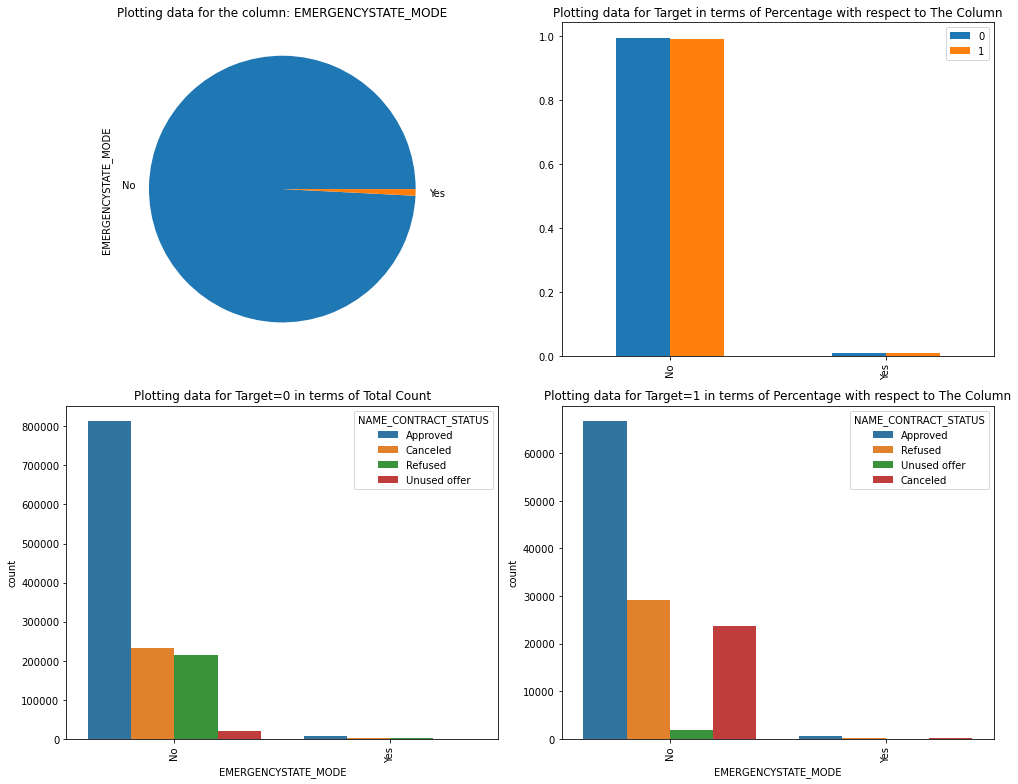

Plot number 1
****************************************************************************************************
Plot for AMT_ANNUITY_CATEGORY Vs NAME_CONTRACT_STATUS


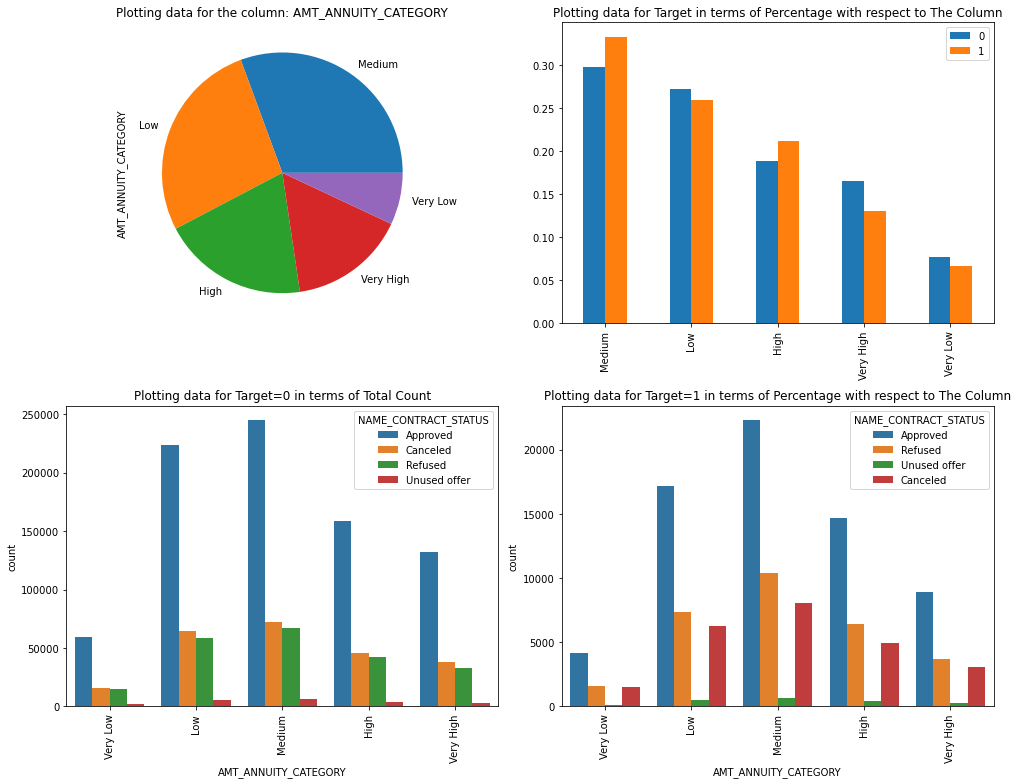

Plot number 2
****************************************************************************************************
Plot for ORGANIZATION_TYPE Vs NAME_CONTRACT_STATUS


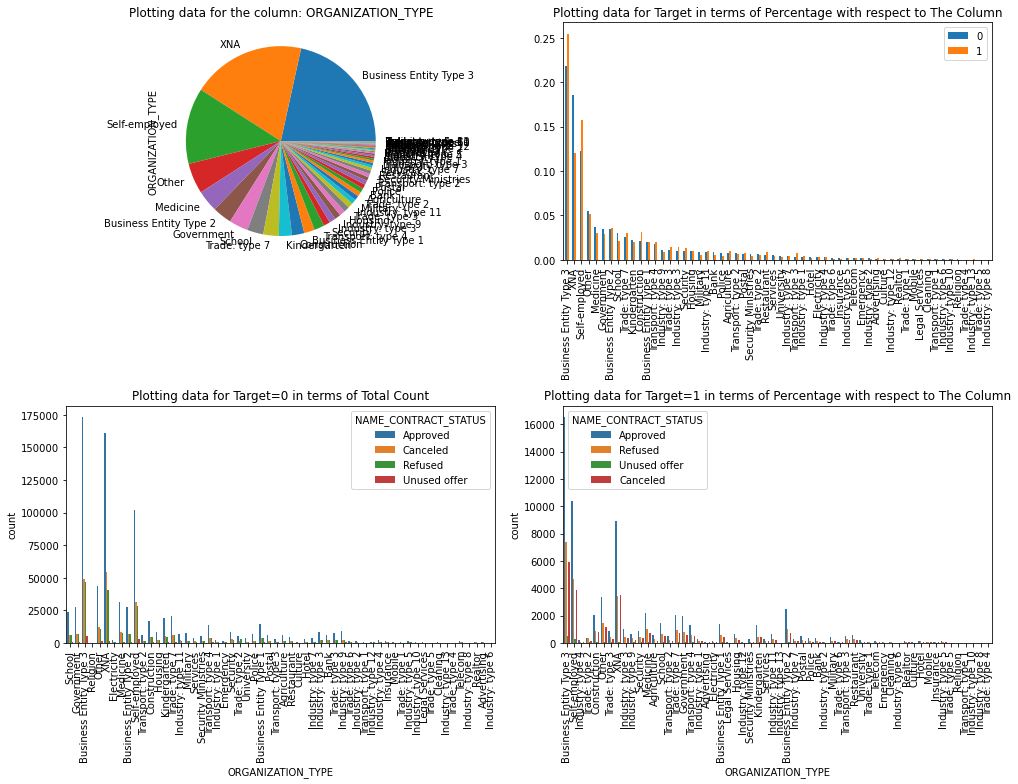

Plot number 3
****************************************************************************************************
Plot for CODE_GENDER Vs NAME_CONTRACT_STATUS


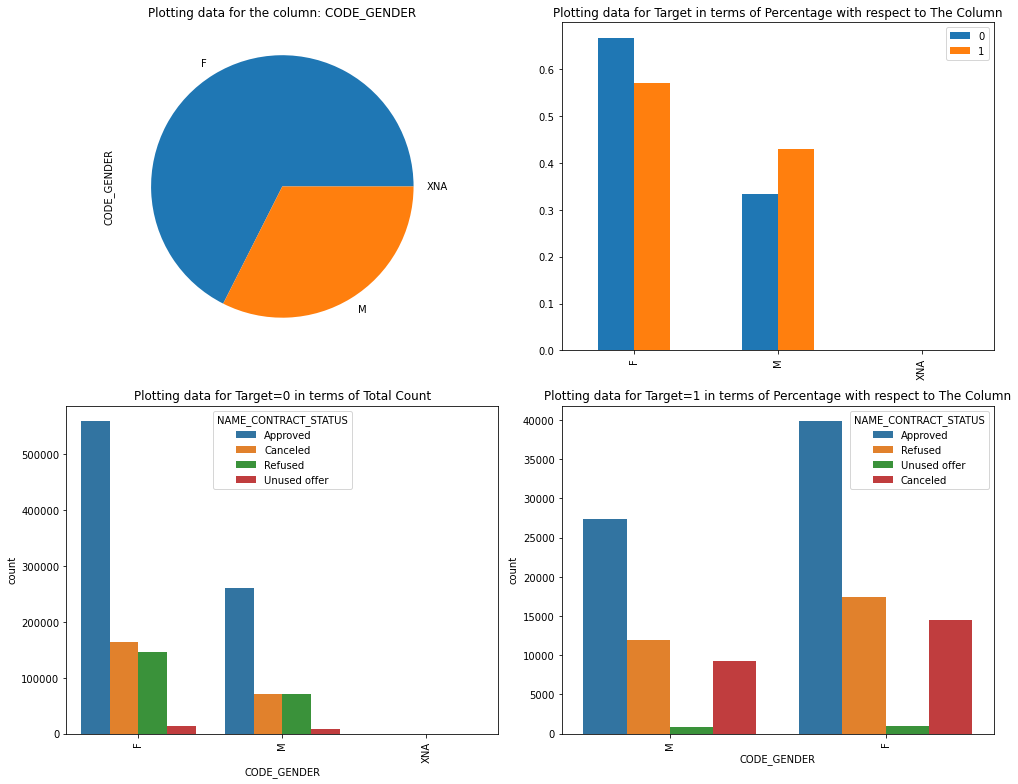

Plot number 4
****************************************************************************************************
Plot for NAME_HOUSING_TYPE Vs NAME_CONTRACT_STATUS


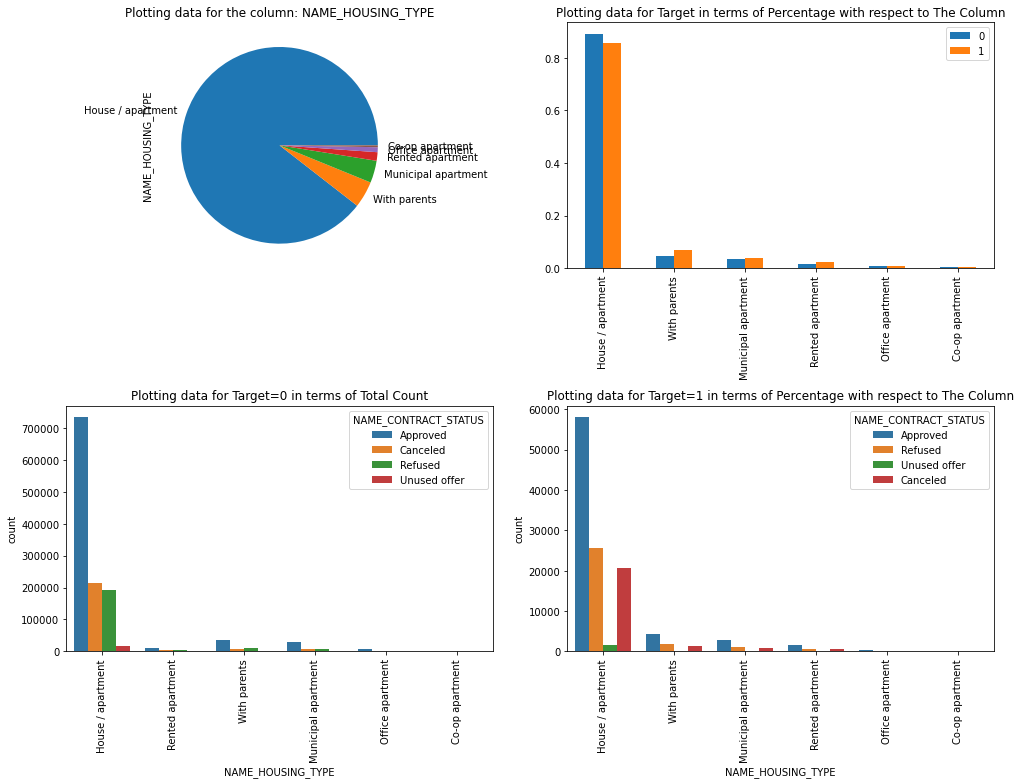

Plot number 5
****************************************************************************************************
Plot for FLAG_OWN_REALTY Vs NAME_CONTRACT_STATUS


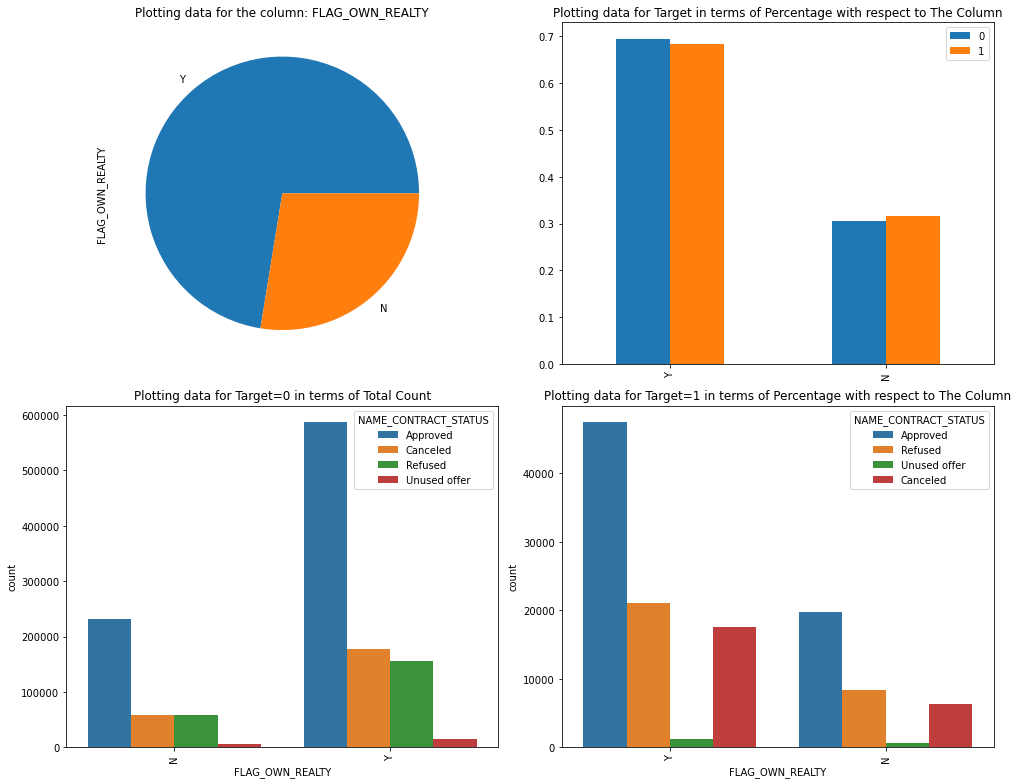

Plot number 6
****************************************************************************************************
Plot for NAME_FAMILY_STATUS Vs NAME_CONTRACT_STATUS


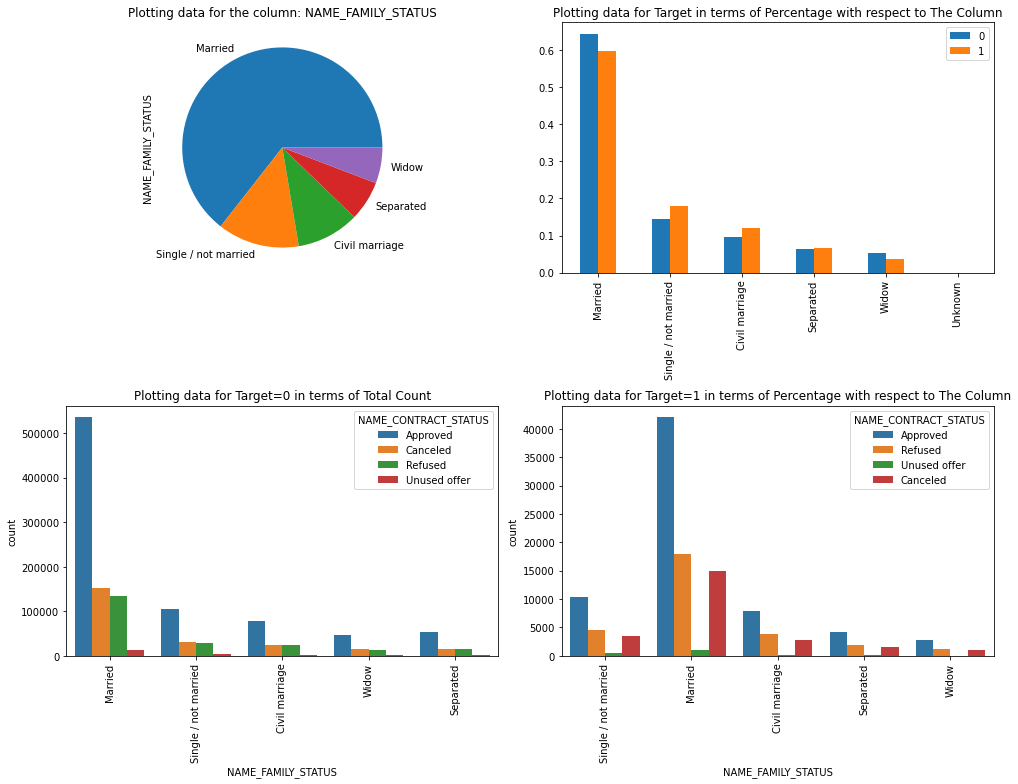

Plot number 7
****************************************************************************************************
Plot for OCCUPATION_TYPE Vs NAME_CONTRACT_STATUS


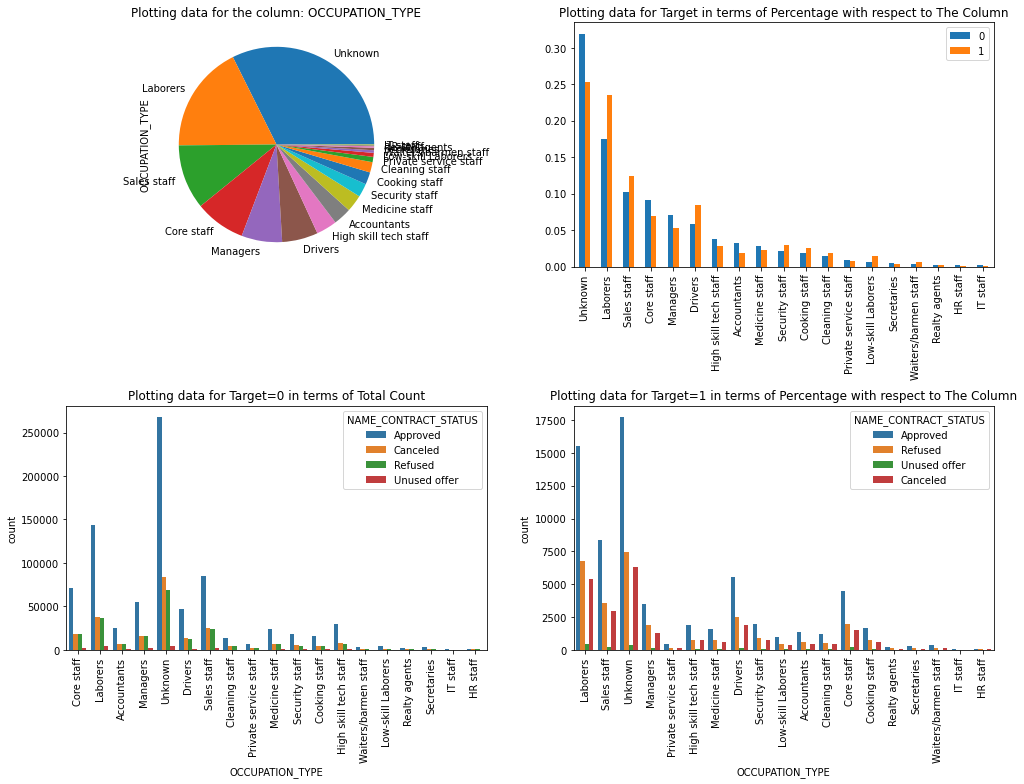

Plot number 8
****************************************************************************************************
Plot for NAME_INCOME_TYPE Vs NAME_CONTRACT_STATUS


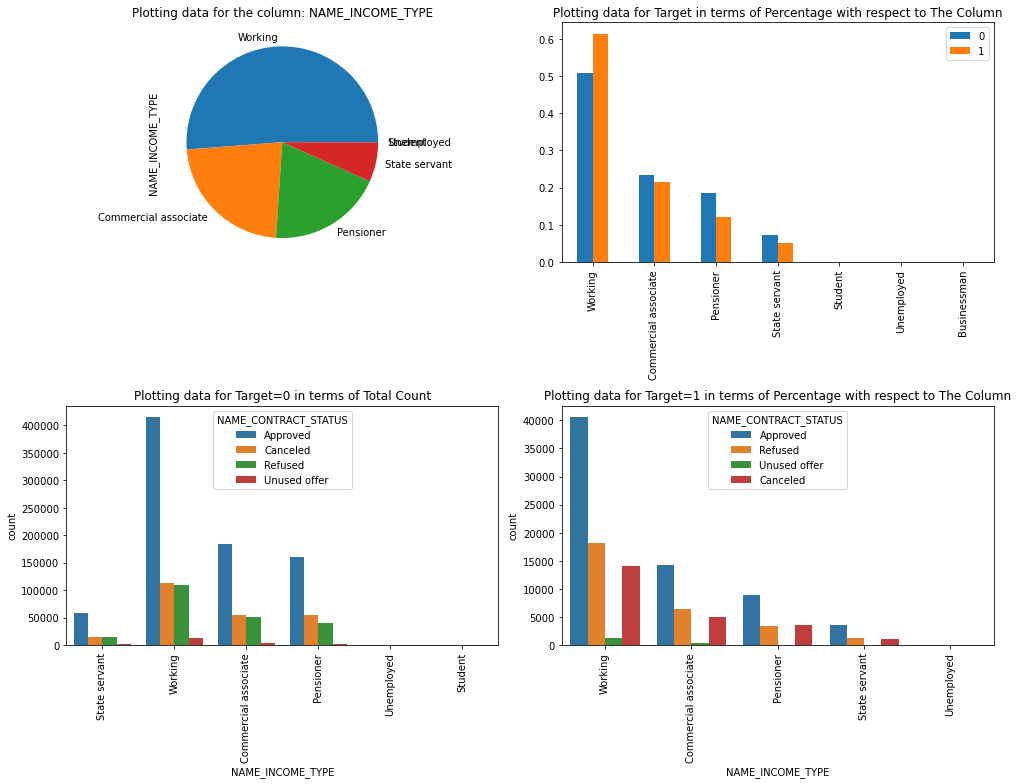

Plot number 9
****************************************************************************************************
Plot for NAME_EDUCATION_TYPE Vs NAME_CONTRACT_STATUS


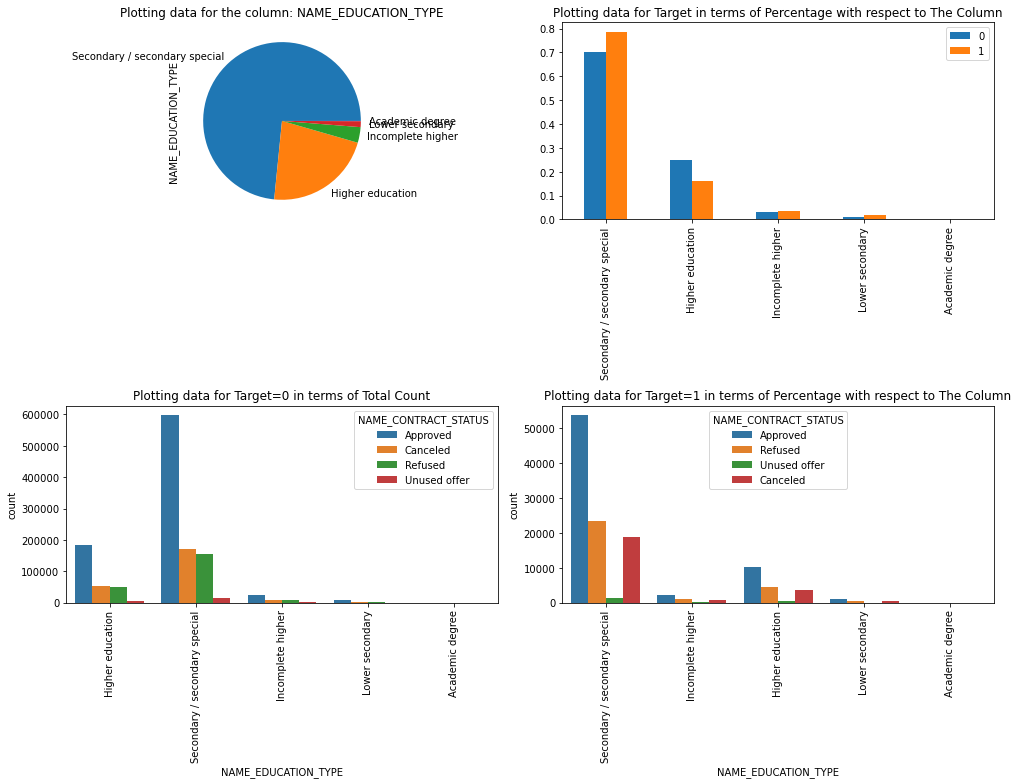

Plot number 10
****************************************************************************************************
Plot for FLAG_OWN_CAR Vs NAME_CONTRACT_STATUS


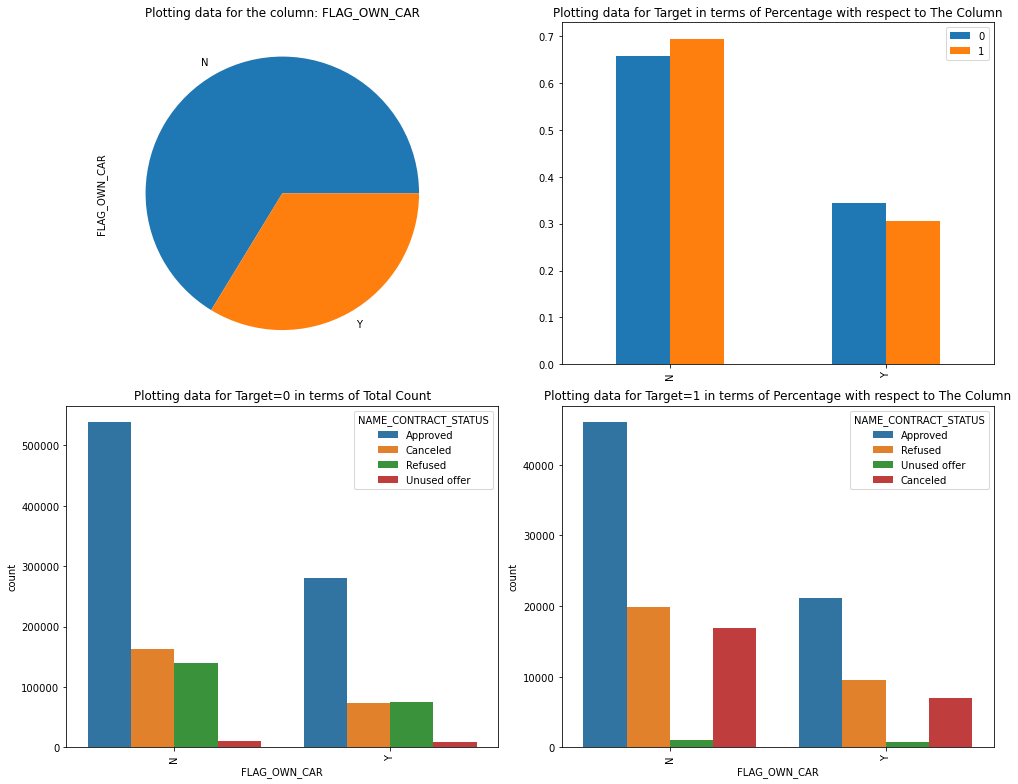

Plot number 11
****************************************************************************************************


In [51]:
# Getting All Categorial Columns
categoricalCols=list(set(df_ca2.columns)-set(df_ca2.describe().columns))
print(len(categoricalCols))
categoricalCols

c=0
for col in categoricalCols:
    if col in mergedApplicationData.columns:
        print("Plot for " +col+ " Vs NAME_CONTRACT_STATUS")
        plotBivariateAnalysis(col,'NAME_CONTRACT_STATUS')
        c=c+1
        print("Plot number",c)
        print("*"*100)

# Summary

1. As Per Plot  NAME_EDUCATION_TYPE Vs NAME_CONTRACT_STATUS:
We can understand that for Secondary/Secondary Special Education clients have more application request compare to other Education and it also shows that this education category has more defaulter compare to other. This category has also high Approved , Cancled, Refused Applicatio status as well. But where as Higher Secondary Education clinet has more Re-payment ability and more Approved rate. So we should focus more on Higher secondary Education category to get Good Loan Re-Payment ability cleints and for Secondary Education client we can plan different strategy.

2. As Per Plot  NAME_OCCUPATION_TYPE Vs NAME_CONTRACT_STATUS:
It shows that there is a Big missing data for which the both (Traget=1) Defaulter and Traget=0(Other) present. So we need to focus on these Category details to collect important info on Occupation type which is playing a major role in terms of deciding defaulters.
 It also shows that Laborers, Sales Staff, Drivers category having more Defaulters compare to other hence more approved application status. So we need to come up with different strategy such as minimum Credit limit and flexible payment option to make these category into out of Defaulters and should consider these categories to approve loan less.
 
3. CODE_GENDER Vs NAME_CONTRACT_STATUS:
As per this plot it shows that Females are applying more for loans compare to Male.Females defaulter ratio compare to other is less where as Male defaulter ratio w.r.t Other is more.

4. AMT_ANNUITY_CATEGORY Vs NAME_CONTRACT_STATUS:
It notify that Medium (20000-30000) AMT_ANNUITY_CATEGORY has more defaulters compare to other.